In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
file_path = '../../data/census.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

age          workclass   fnlgt   education   education-num  \
0   39          State-gov   77516   Bachelors              13   
1   50   Self-emp-not-inc   83311   Bachelors              13   
2   38            Private  215646     HS-grad               9   
3   53            Private  234721        11th               7   
4   28            Private  338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  salary  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [3]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age  workclass         fnlgt  education   education-num  \
count   32561.000000      32561  3.256100e+04      32561    32561.000000   
unique           NaN          9           NaN         16             NaN   
top              NaN    Private           NaN    HS-grad             NaN   
freq             NaN      22696           NaN      10501             NaN   
mean       38.581647        NaN  1.897784e+05        NaN       10.080679   
std        13.640433        NaN  1.055500e+05        NaN        2.572720   
min        17.000000        NaN  1.228500e+04        NaN        1.000000   
25%        28.000000        NaN  1.178270e+05        NaN        9.000000   
50%        37.000000        NaN  1.783560e+05        NaN       10.000000   
75%        48.000000        NaN  2.370510e+05        NaN       12.000000   
max        90.000000        NaN  1.484705e+06        NaN       16.000000   

             marital-status       occupation  relationship    race    sex  \
count                 32561            32561         32561   32561  32561   
unique                    7               15             6       5      2   
top      Married-civ-spouse   Prof-specialty       Husband   White   Male   
freq                  14976             4140         13193   27816  21790   
mean                    NaN              NaN           NaN     NaN    NaN   
std                     NaN              NaN           NaN     NaN    NaN   
min                     NaN              NaN           NaN     NaN    NaN   
25%                     NaN              NaN           NaN     NaN    NaN   
50%                     NaN              NaN           NaN     NaN    NaN   
75%                     NaN              NaN           NaN     NaN    NaN   
max                     NaN              NaN           NaN     NaN    NaN   

         capital-gain   capital-loss   hours-per-week  native-country  salary  
count    32561.000000   32561.000000     32561.000000           32561   32561  
unique            NaN            NaN              NaN              42       2  
top               NaN            NaN              NaN   United-States   <=50K  
freq              NaN            NaN              NaN           29170   24720  
mean      1077.648844      87.303830        40.437456             NaN     NaN  
std       7385.292085     402.960219        12.347429             NaN     NaN  
min          0.000000       0.000000         1.000000             NaN     NaN  
25%          0.000000       0.000000        40.000000             NaN     NaN  
50%          0.000000       0.000000        40.000000             NaN     NaN  
75%          0.000000       0.000000        45.000000             NaN     NaN  
max      99999.000000    4356.000000        99.000000             NaN     NaN

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 24


In [17]:
import textwrap

# Display data types and unique values for categorical features
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    unique_values_str = ', '.join([str(category) for category in unique_values])
    wrapped_values = textwrap.fill(unique_values_str, width=80, subsequent_indent=' ' * 9)
    print(f'{column}: {df[column].nunique()} unique values')
    print(f'\t{wrapped_values}')

 workclass: 9 unique values
	 State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  ?,  Self-
         emp-inc,  Without-pay,  Never-worked
 education: 16 unique values
	 Bachelors,  HS-grad,  11th,  Masters,  9th,  Some-college,  Assoc-acdm,  Assoc-
         voc,  7th-8th,  Doctorate,  Prof-school,  5th-6th,  10th,  1st-4th,
         Preschool,  12th
 marital-status: 7 unique values
	 Never-married,  Married-civ-spouse,  Divorced,  Married-spouse-absent,
         Separated,  Married-AF-spouse,  Widowed
 occupation: 15 unique values
	 Adm-clerical,  Exec-managerial,  Handlers-cleaners,  Prof-specialty,  Other-
         service,  Sales,  Craft-repair,  Transport-moving,  Farming-fishing,
         Machine-op-inspct,  Tech-support,  ?,  Protective-serv,  Armed-Forces,
         Priv-house-serv
 relationship: 6 unique values
	 Not-in-family,  Husband,  Wife,  Own-child,  Unmarried,  Other-relative
 race: 5 unique values
	 White,  Black,  Asian-Pac-Islander,  Amer-Indian-Eskimo,

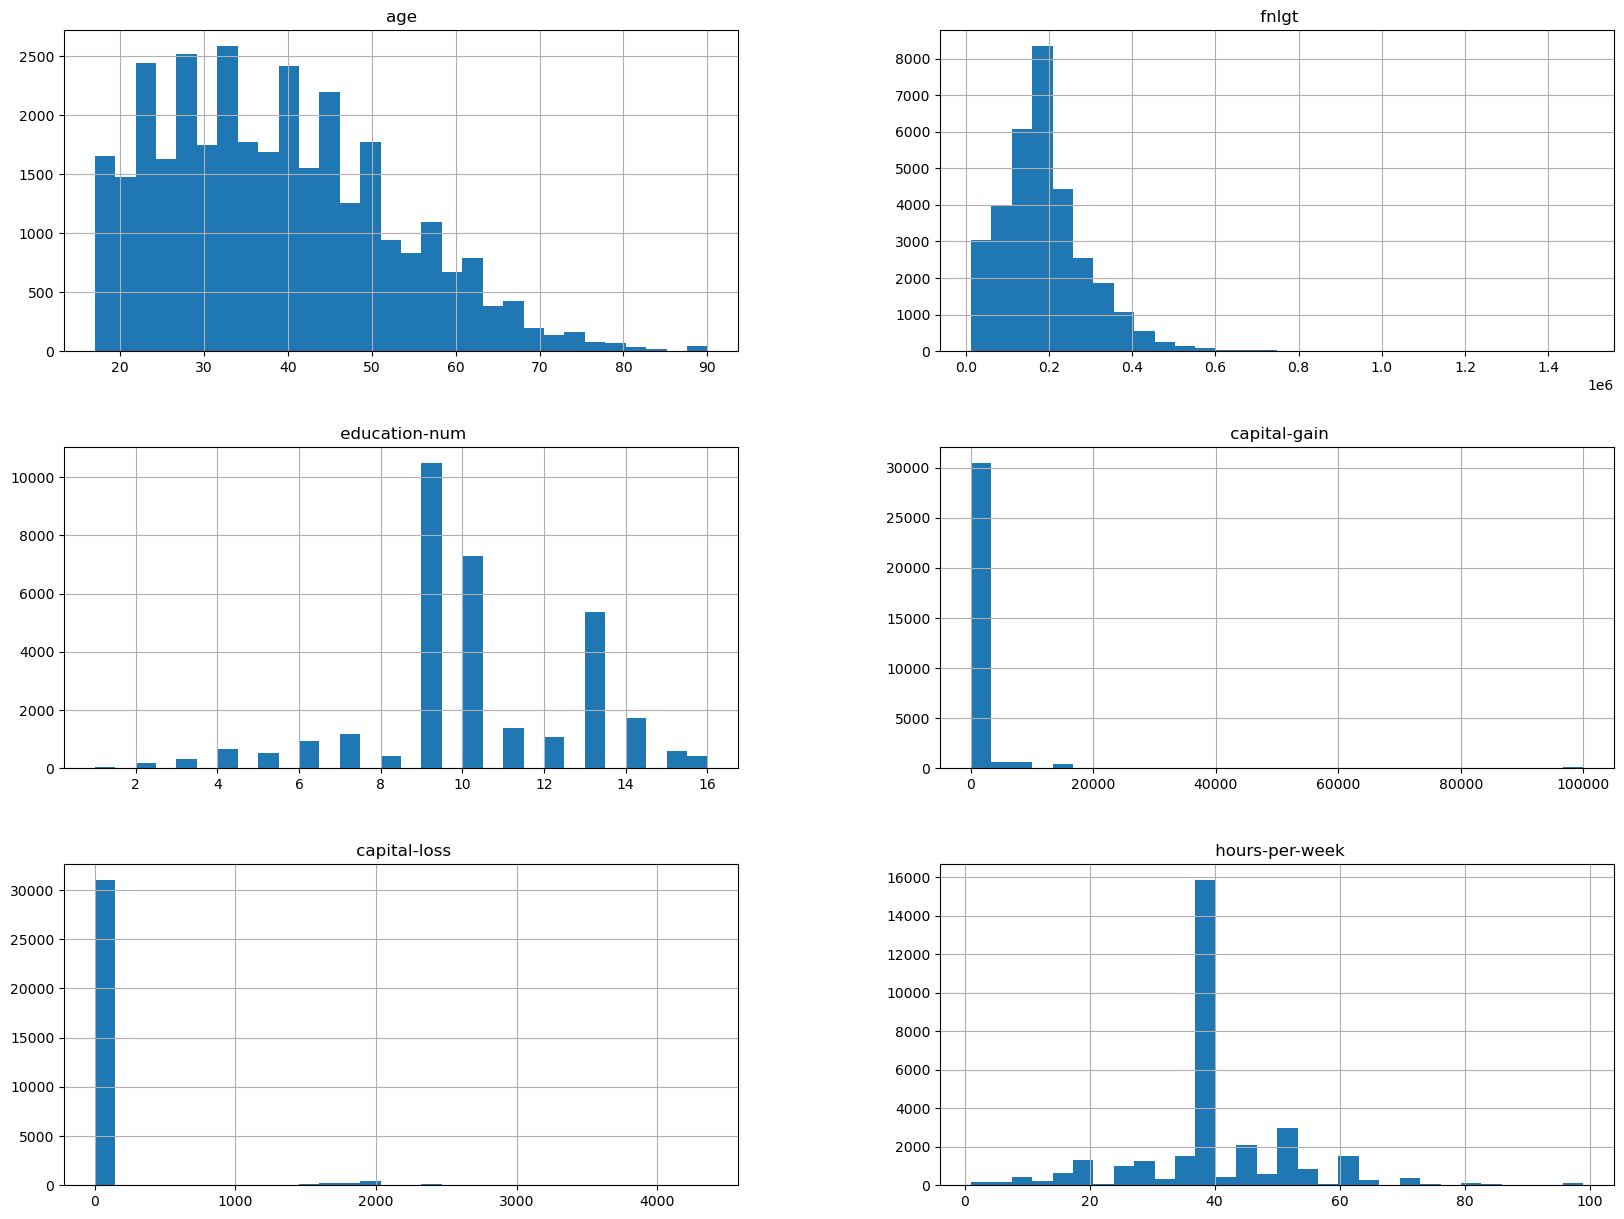

In [18]:
# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

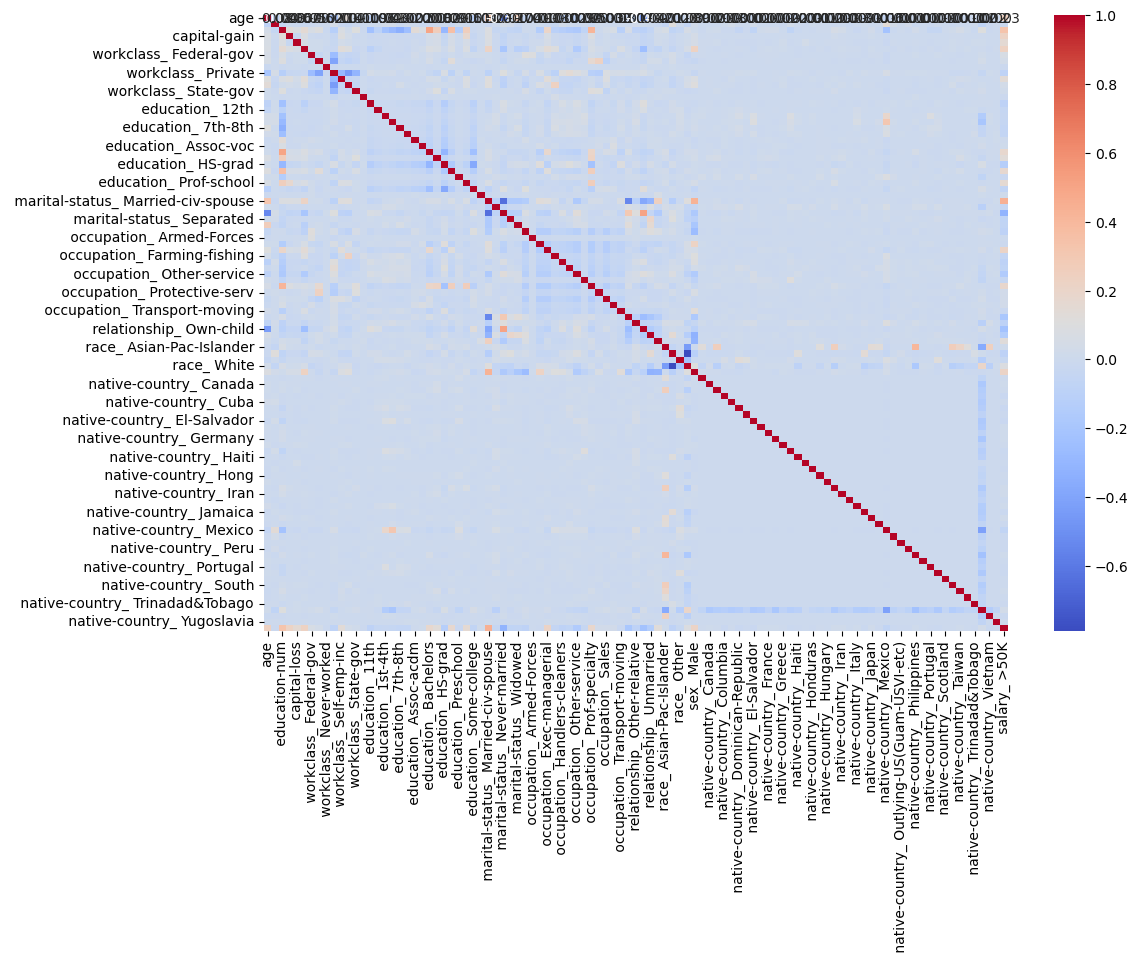

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' is your dataframe
# Convert categorical columns to one-hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

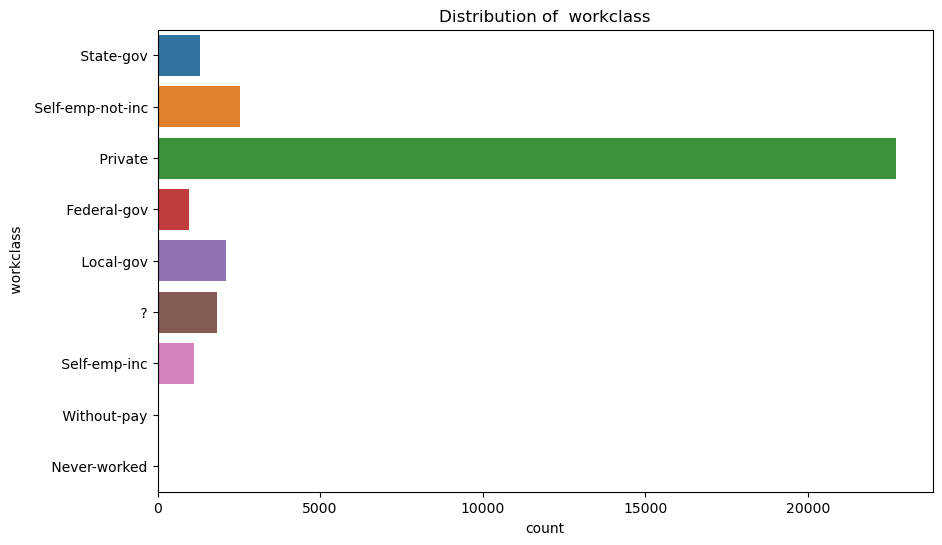

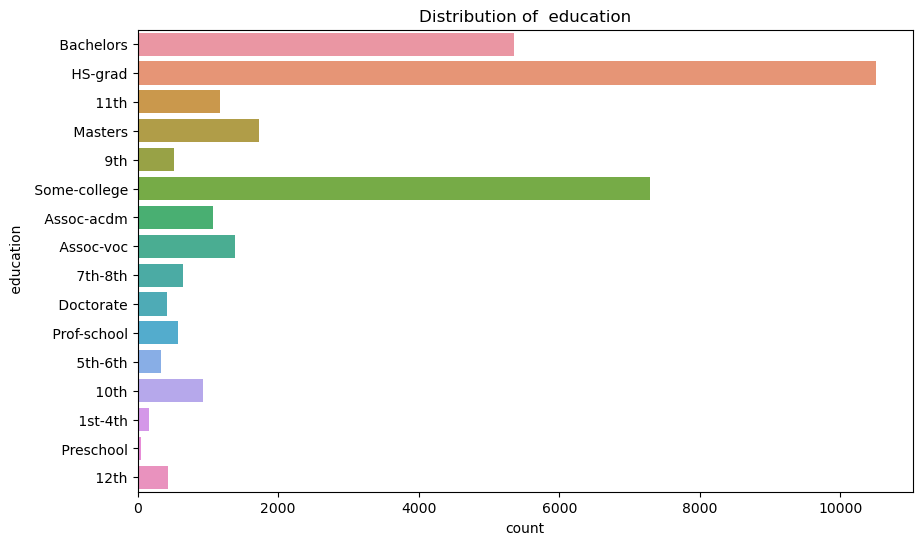

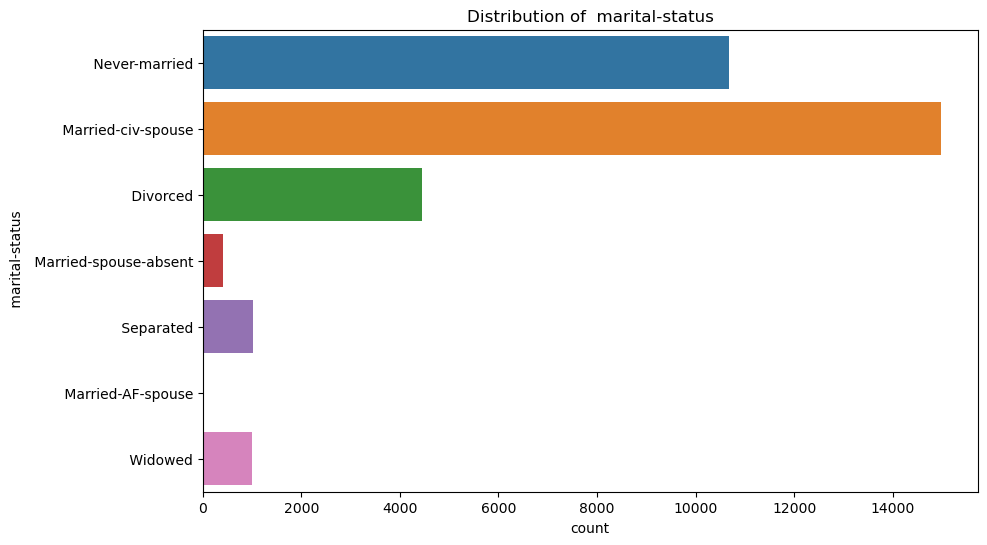

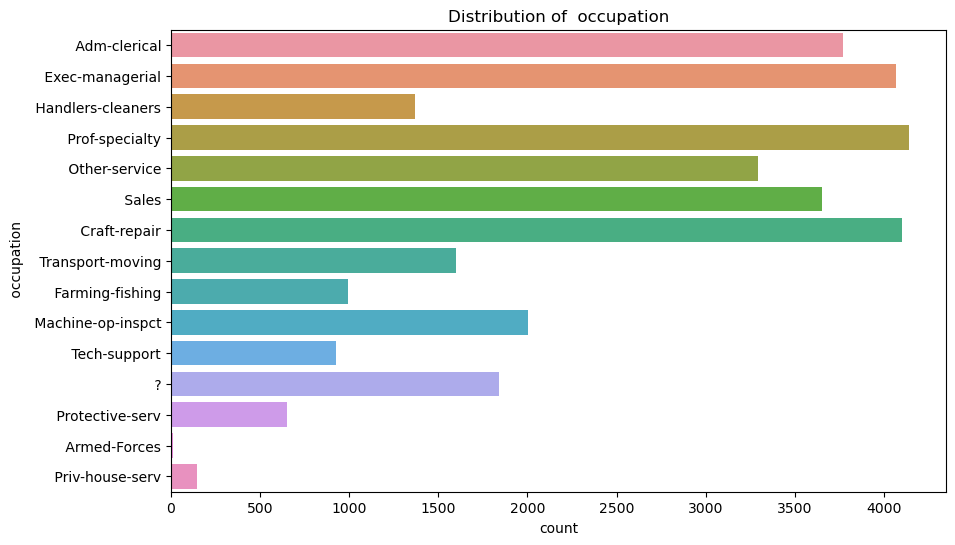

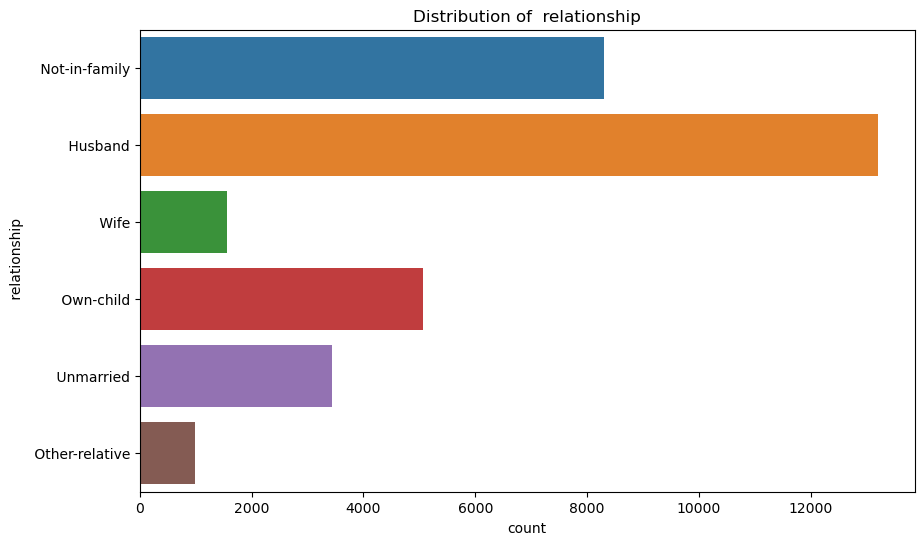

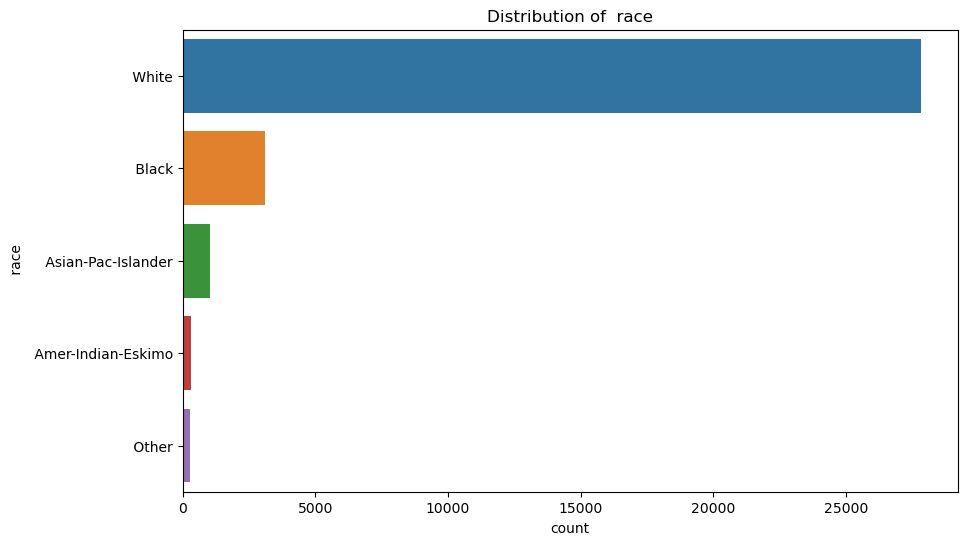

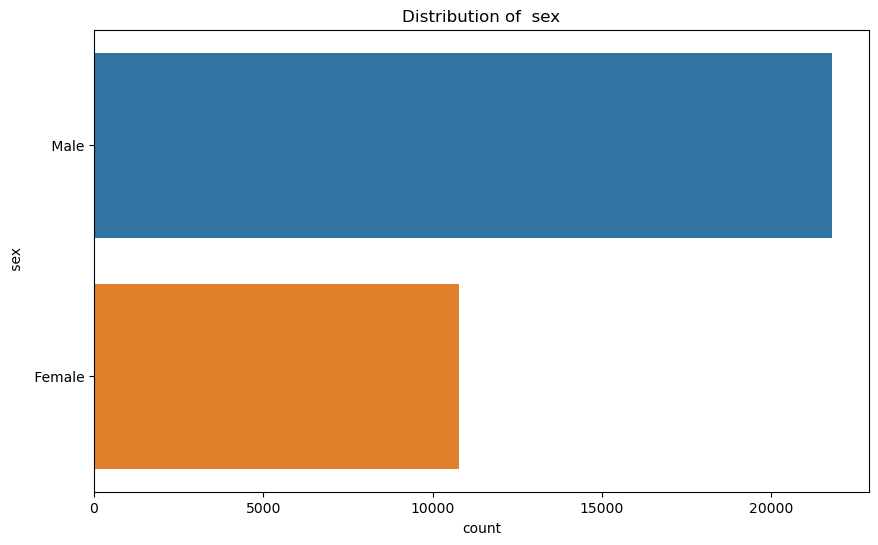

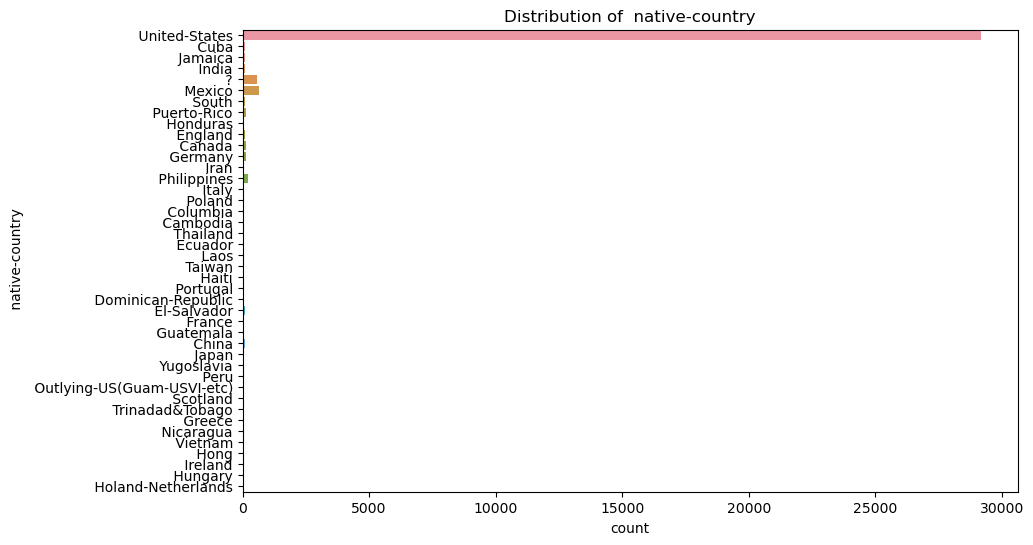

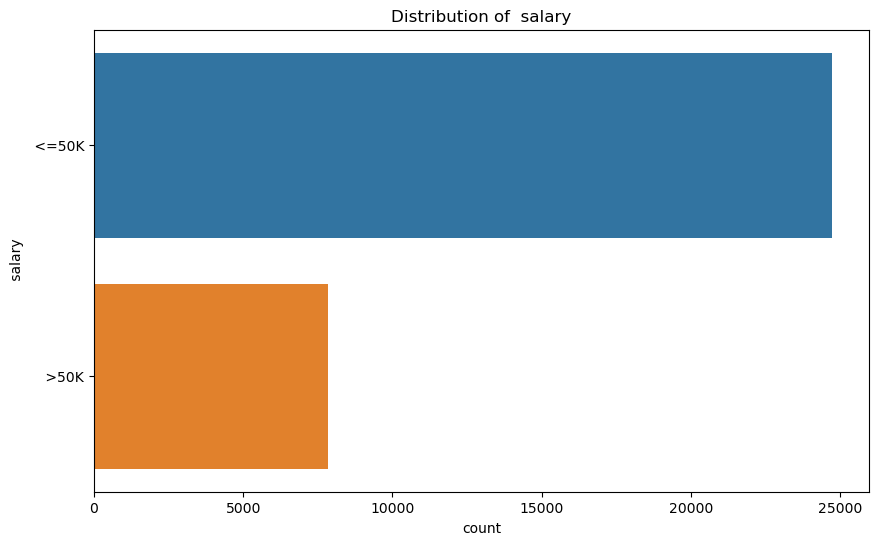

In [22]:
# Visualize the distribution of categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

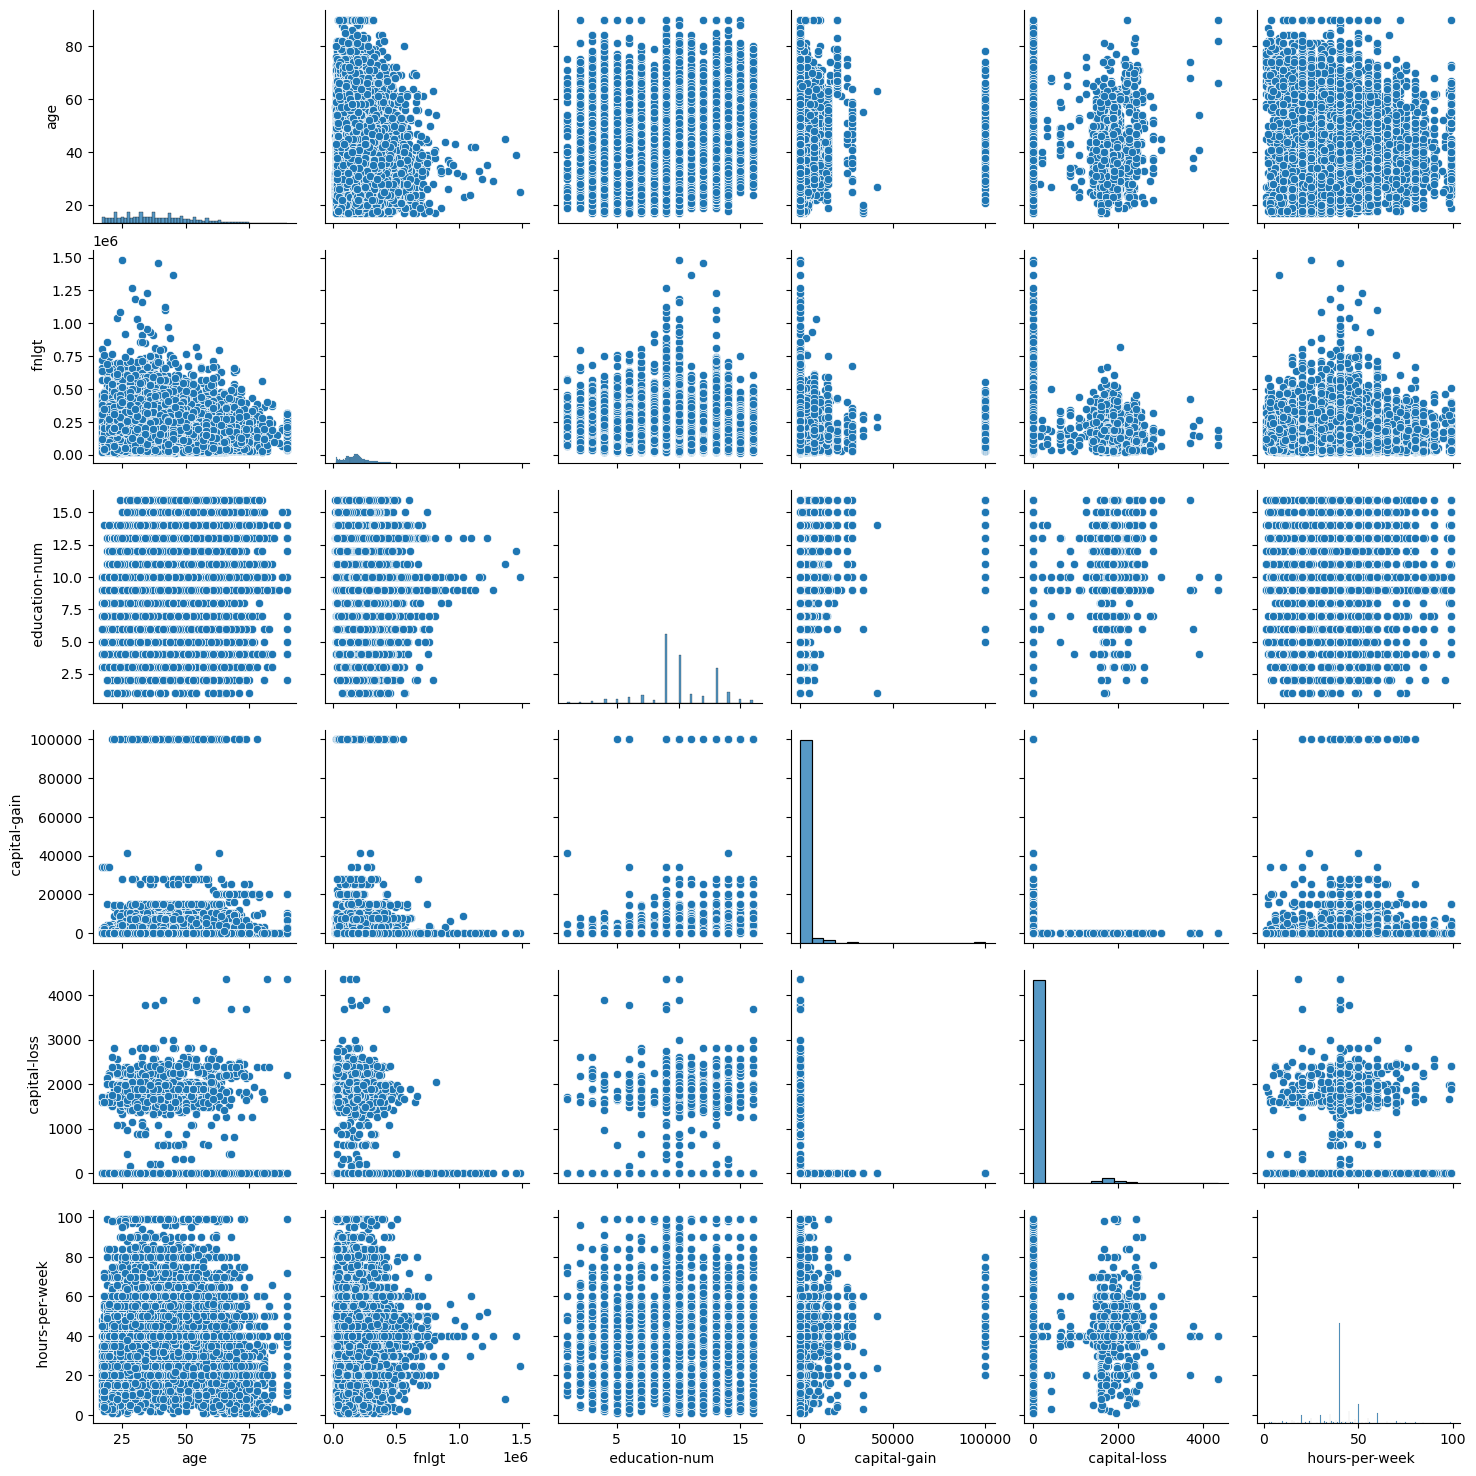

In [26]:
# Replace infinity values with NaN in the DataFrame
df = df.replace([float('inf'), float('-inf')], float('nan'))

# Pair plot for numerical features
sns.pairplot(df.select_dtypes(include=['number']))

# Display the plot
plt.show()

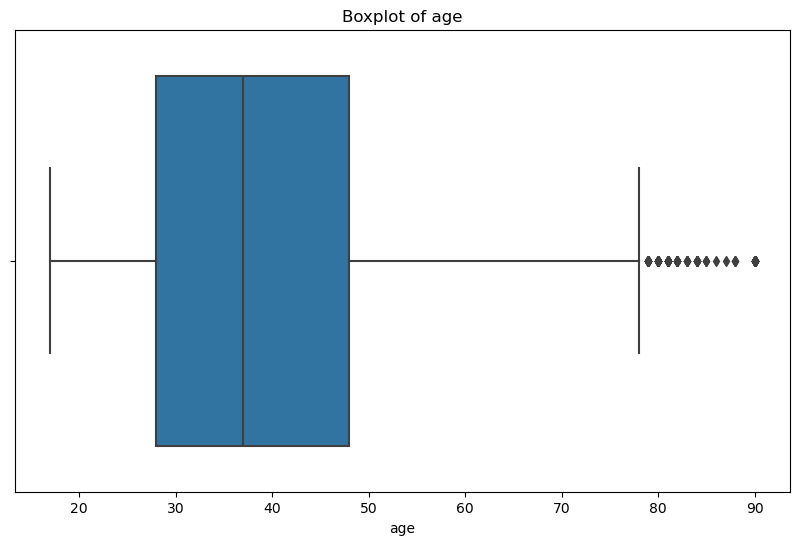

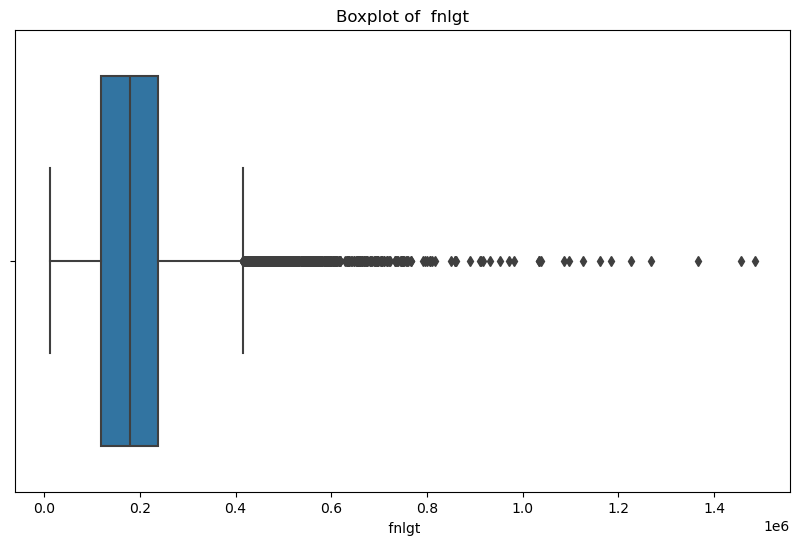

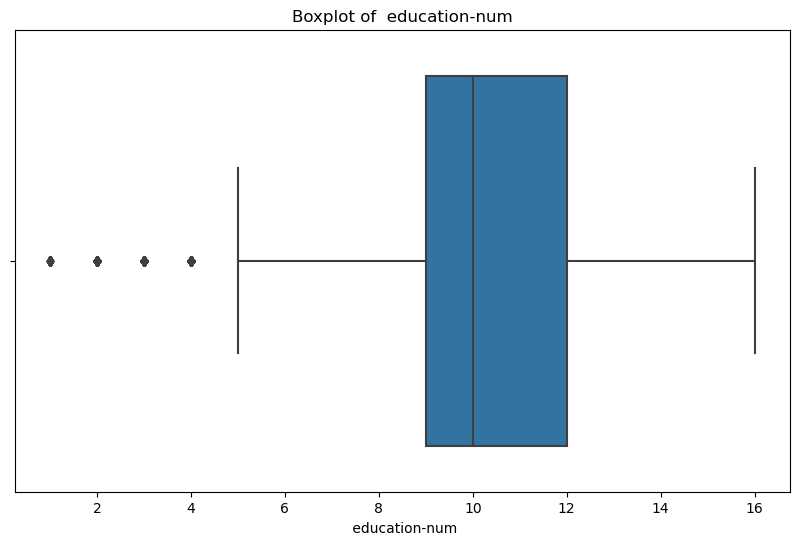

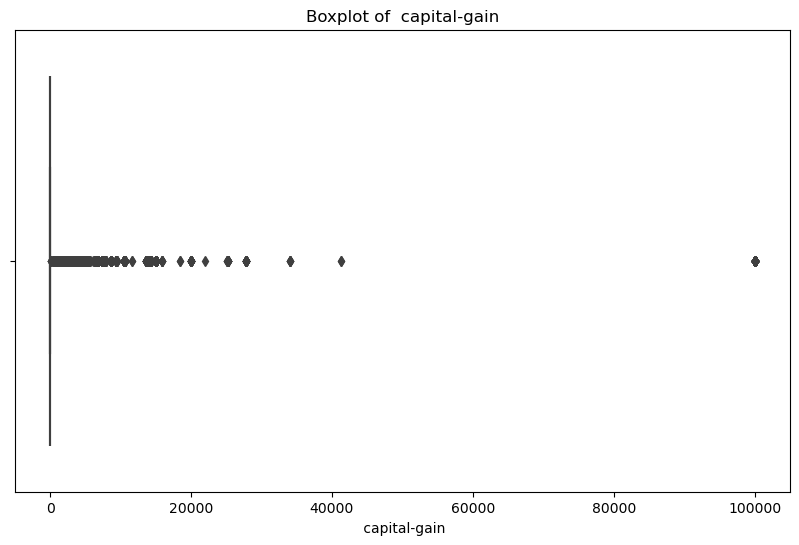

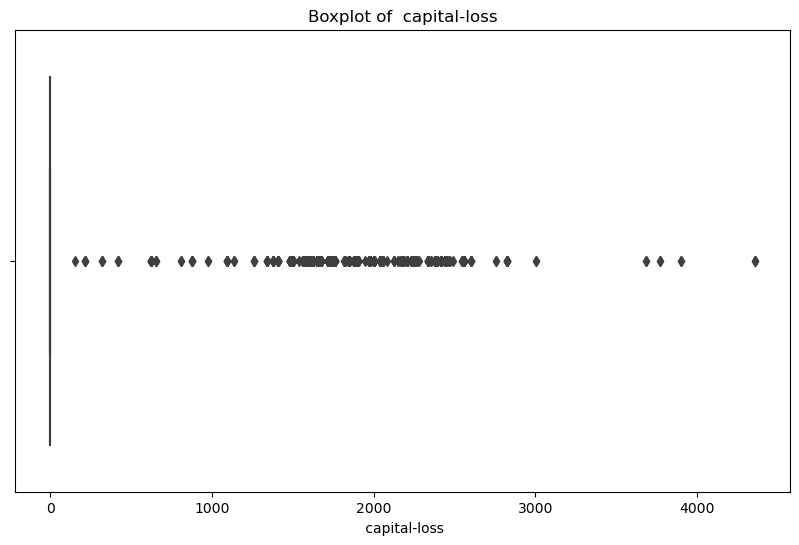

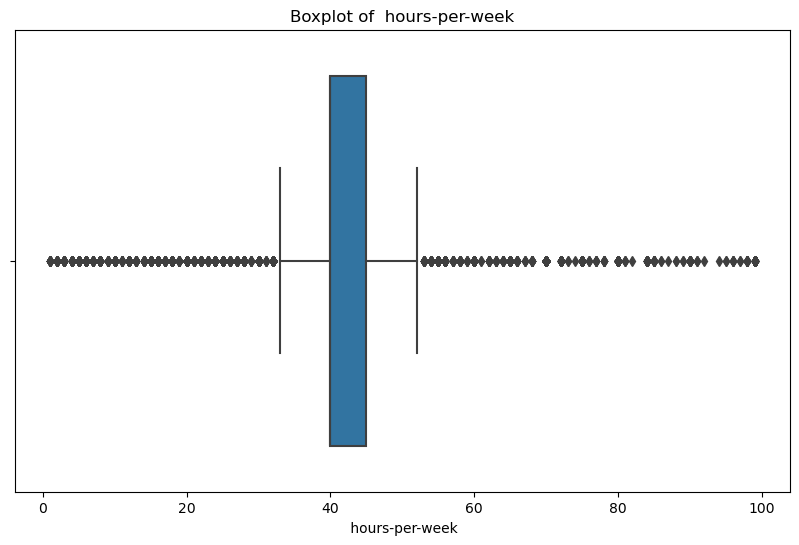

In [27]:
# Boxplots for numerical features
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [29]:
# Checking for outliers using inter-quartile ranges
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f'Number of outliers in {column}: {outliers.shape[0]}')

Number of outliers in age: 143
Number of outliers in  fnlgt: 992
Number of outliers in  education-num: 1198
Number of outliers in  capital-gain: 2712
Number of outliers in  capital-loss: 1519
Number of outliers in  hours-per-week: 9008


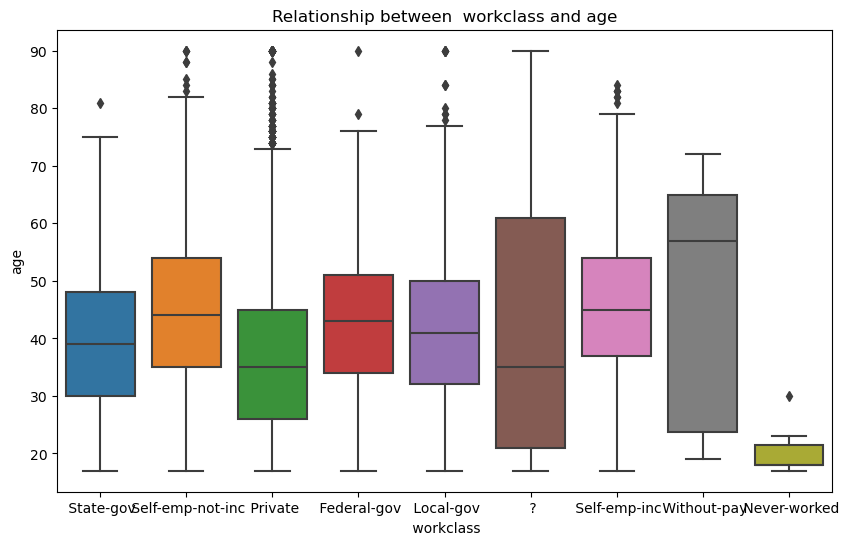

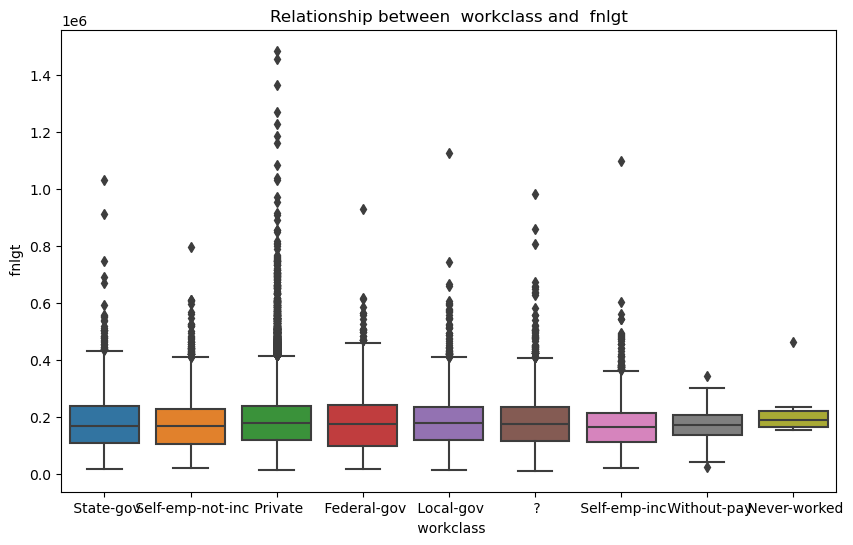

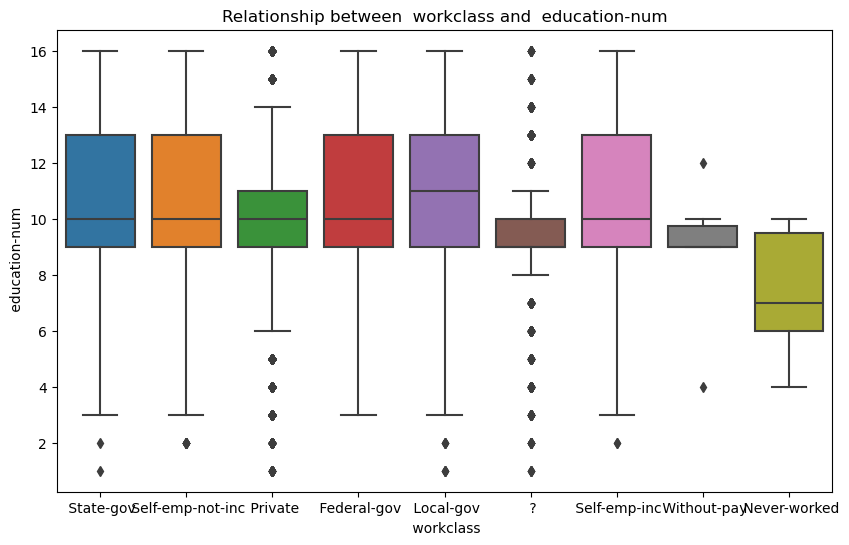

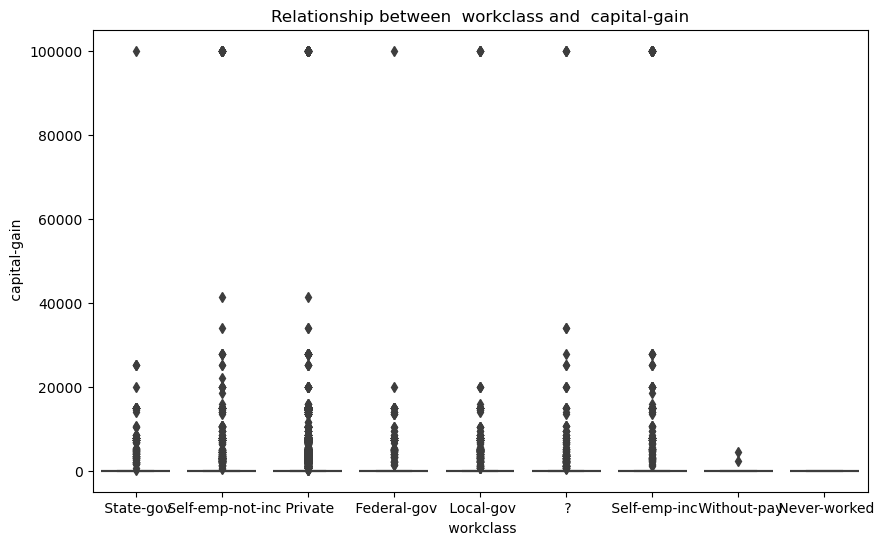

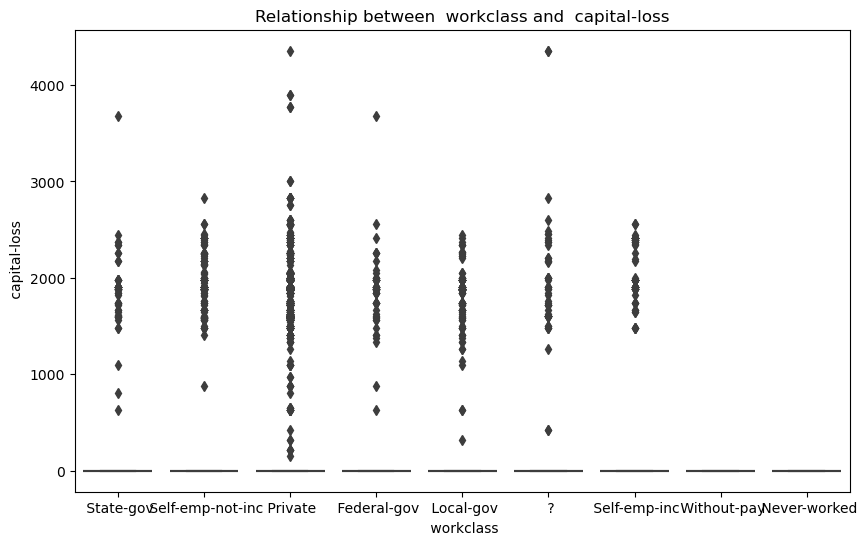

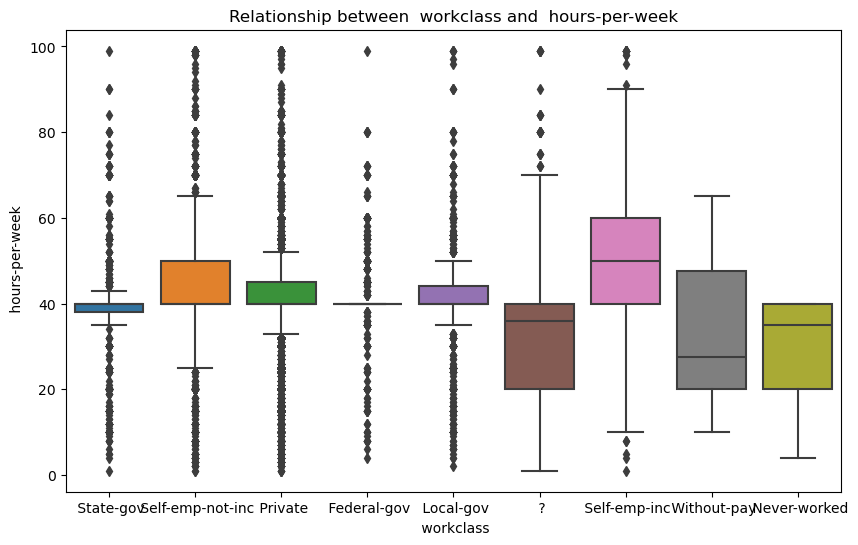

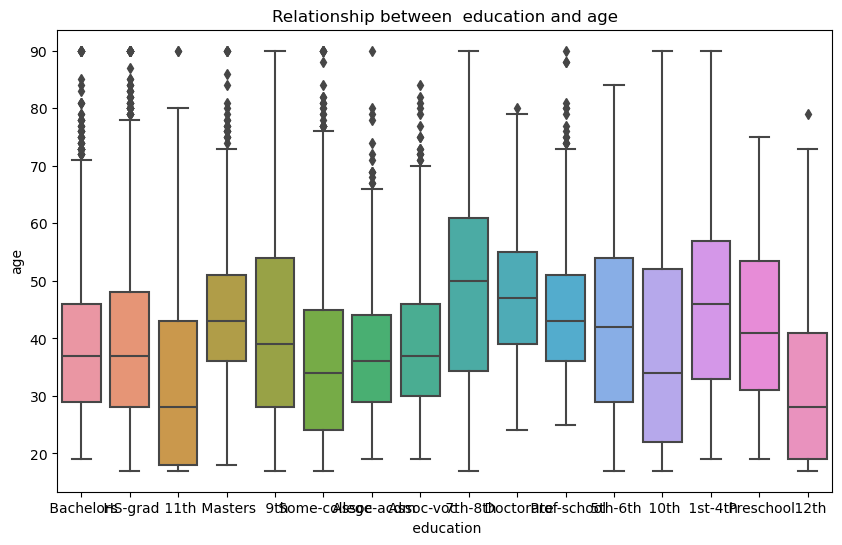

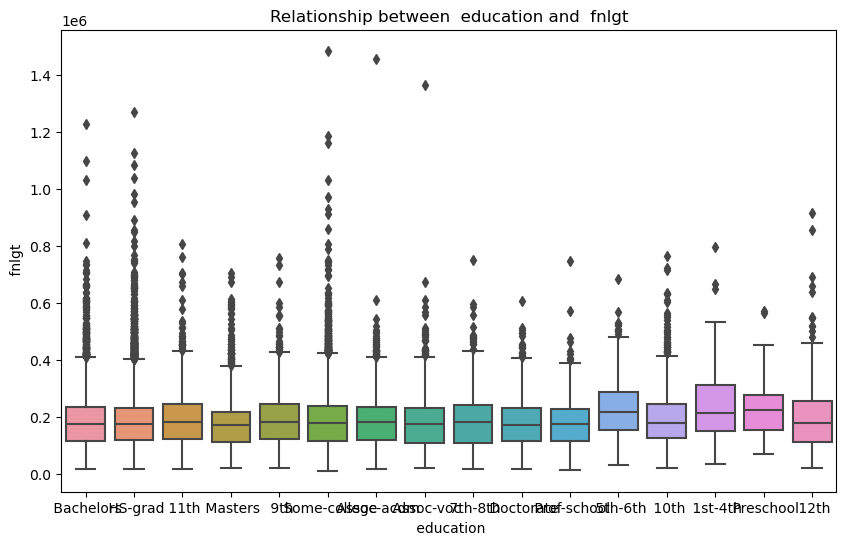

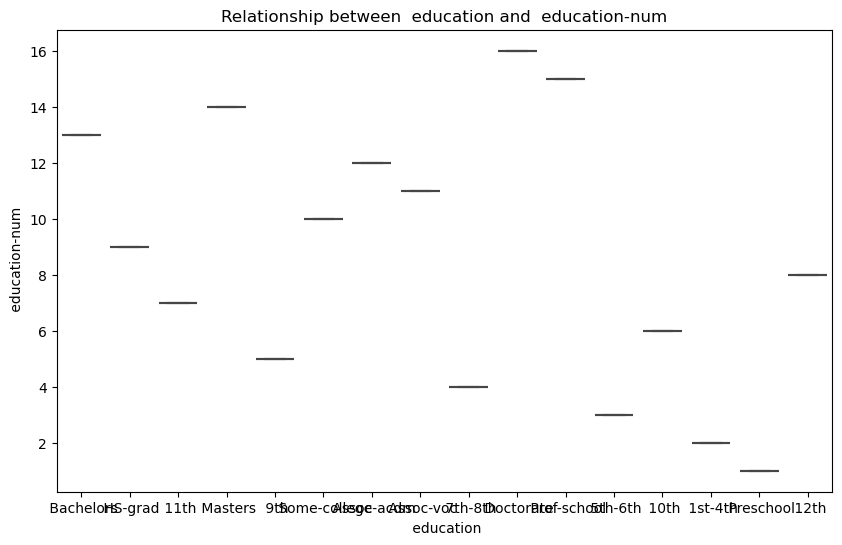

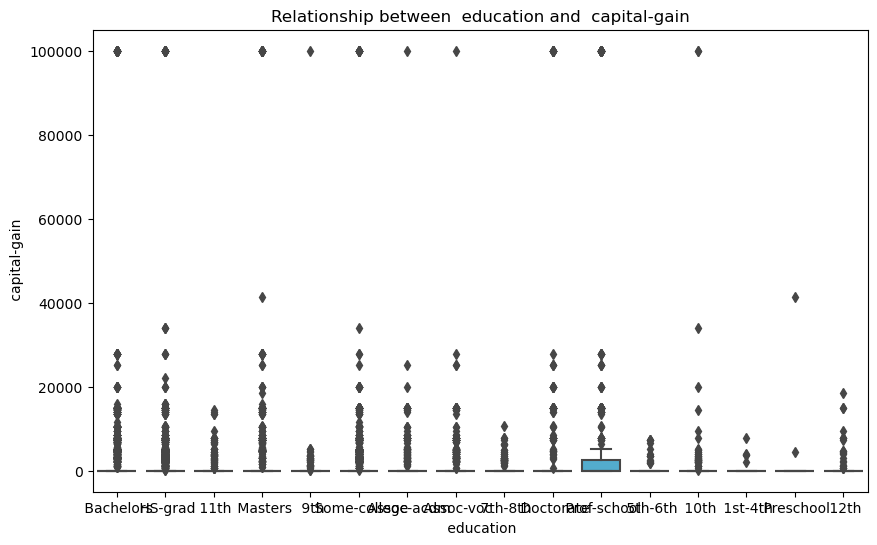

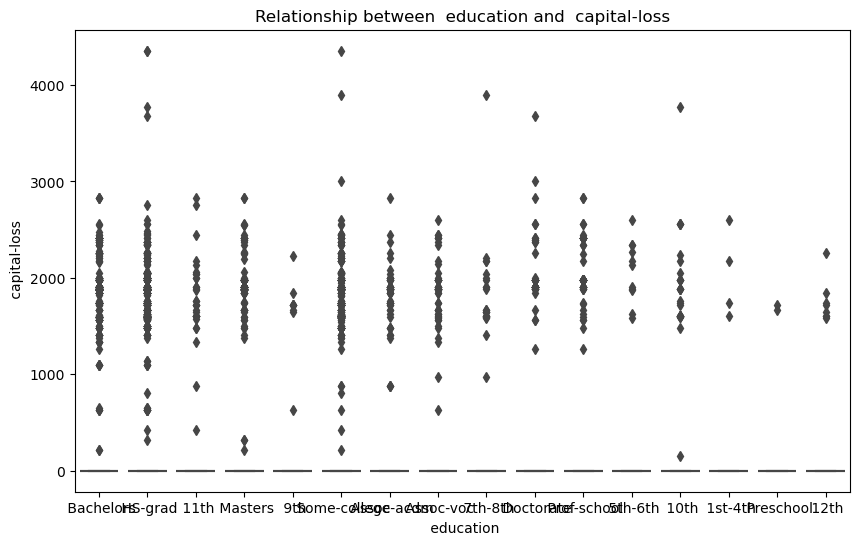

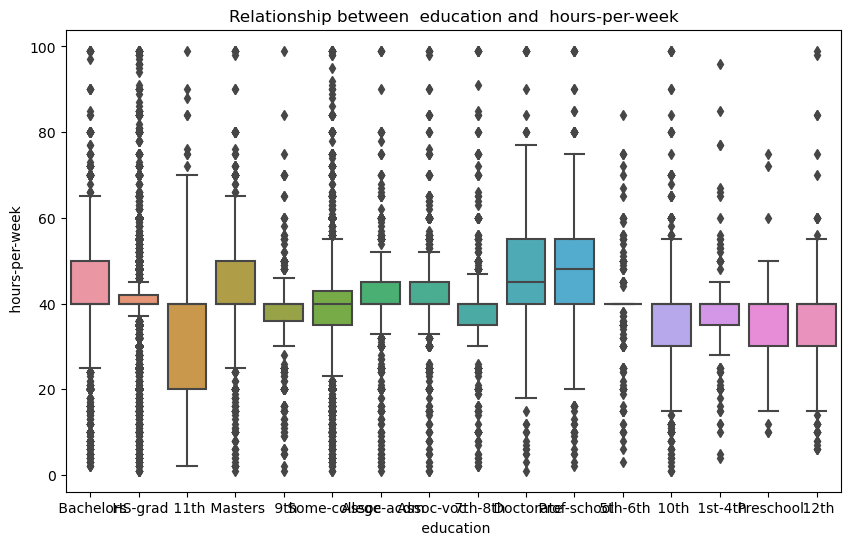

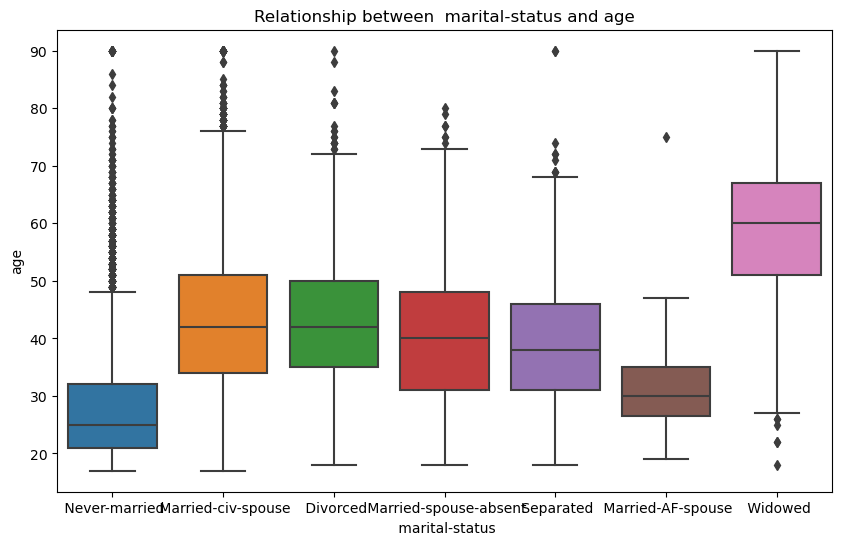

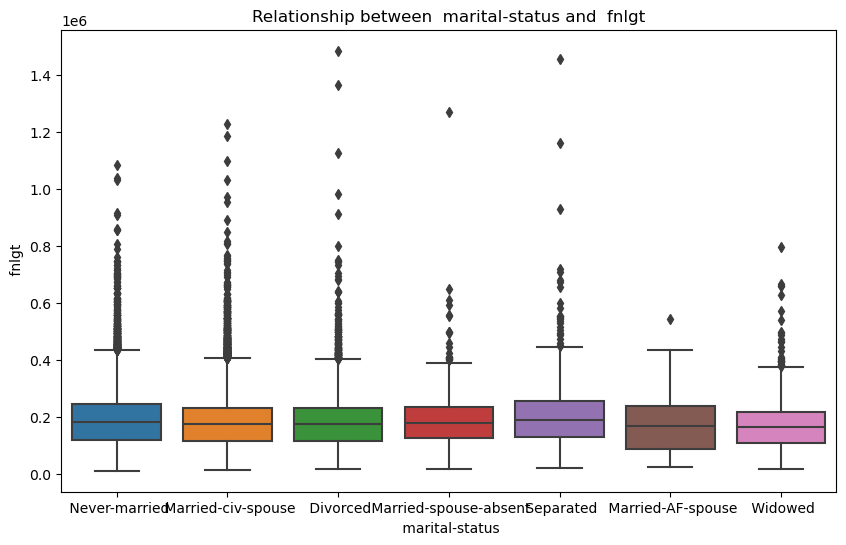

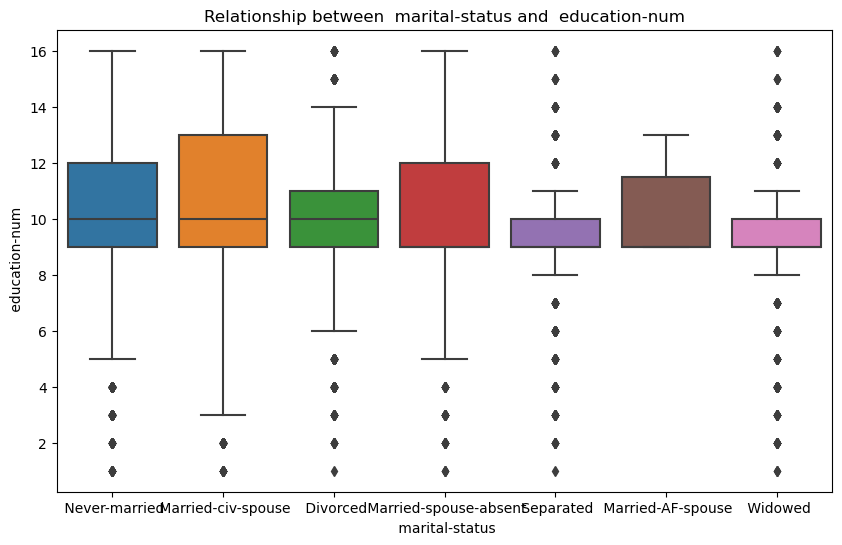

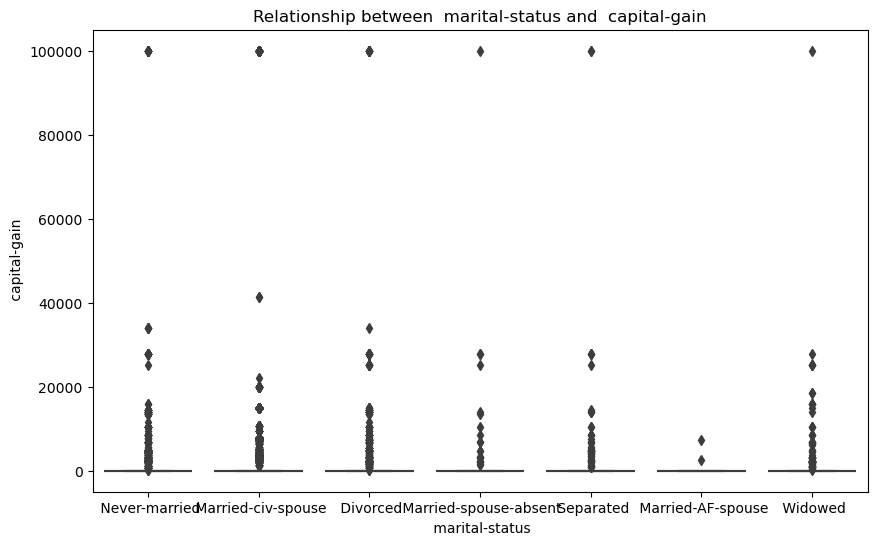

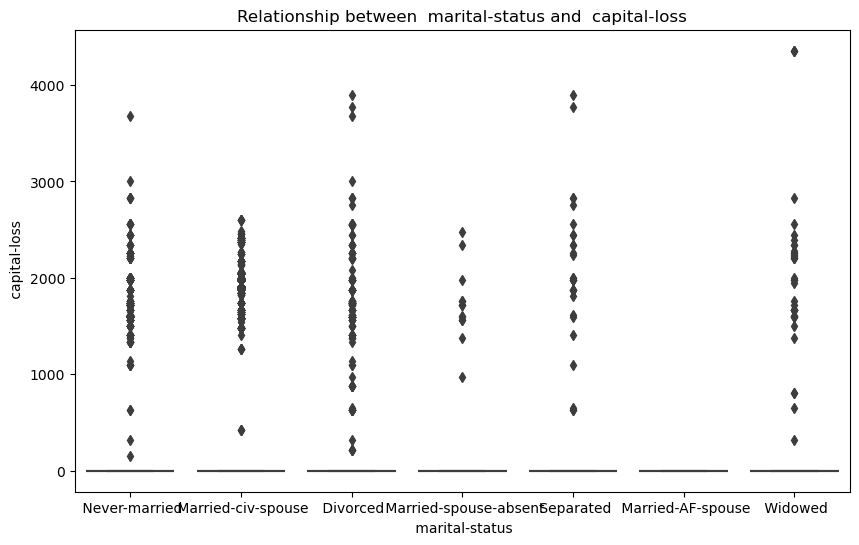

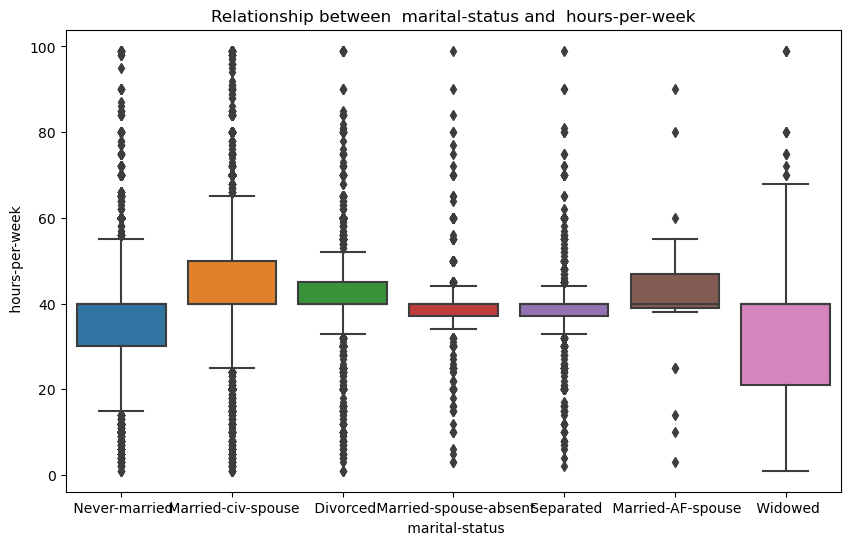

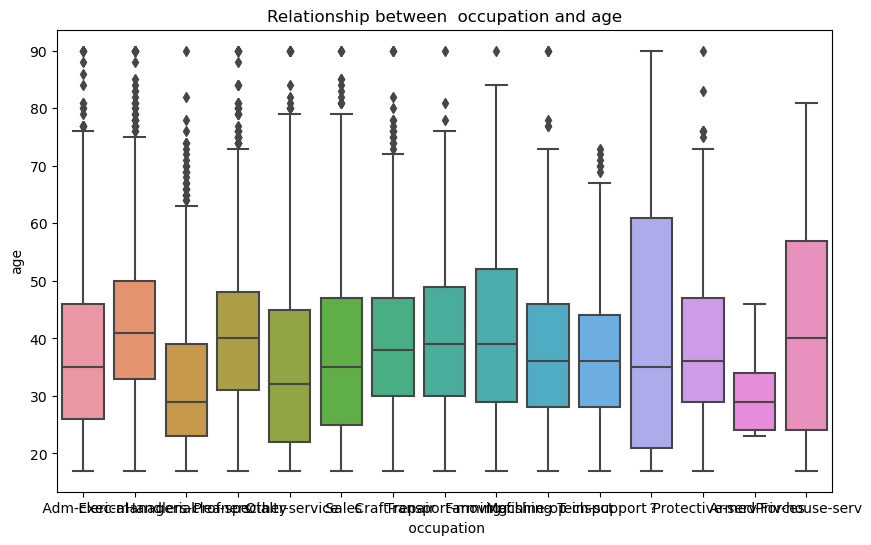

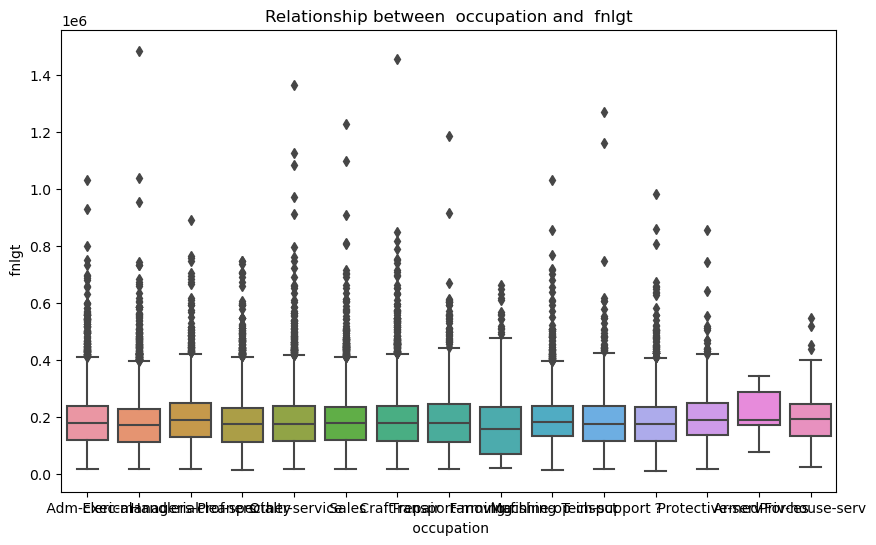

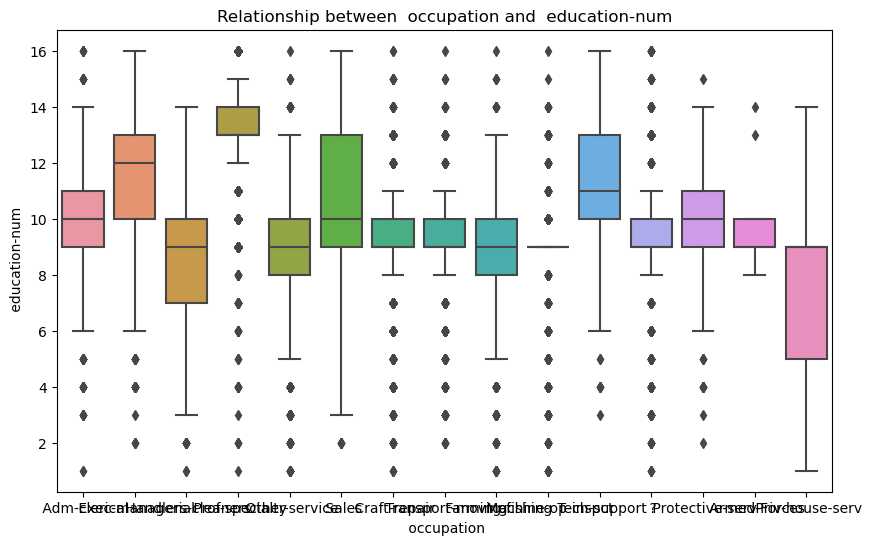

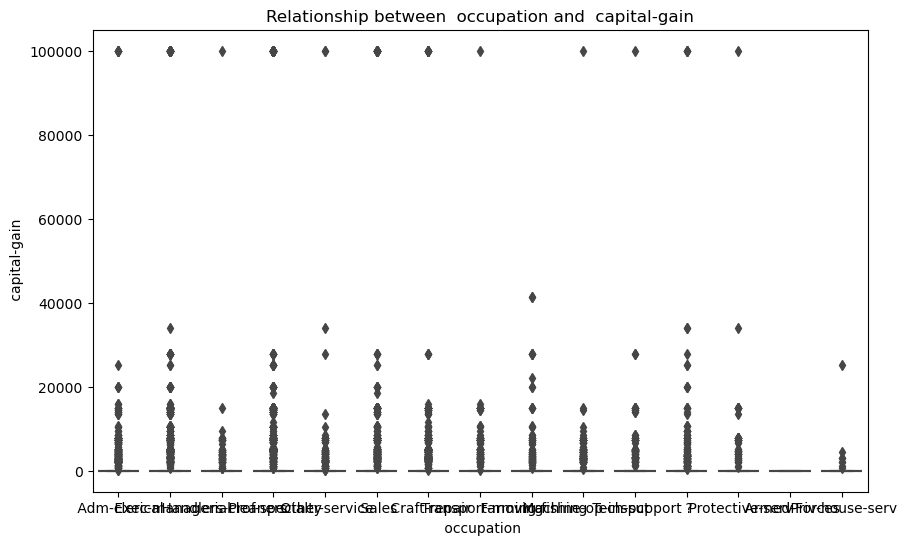

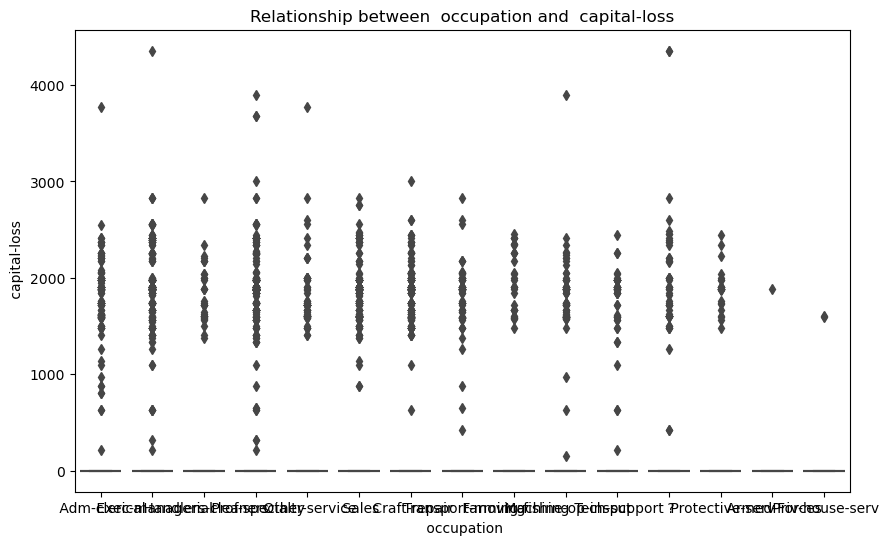

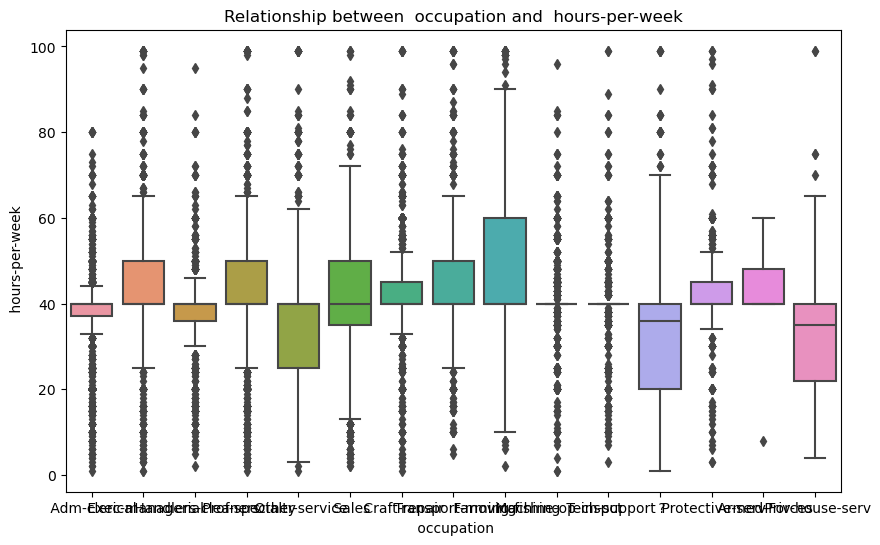

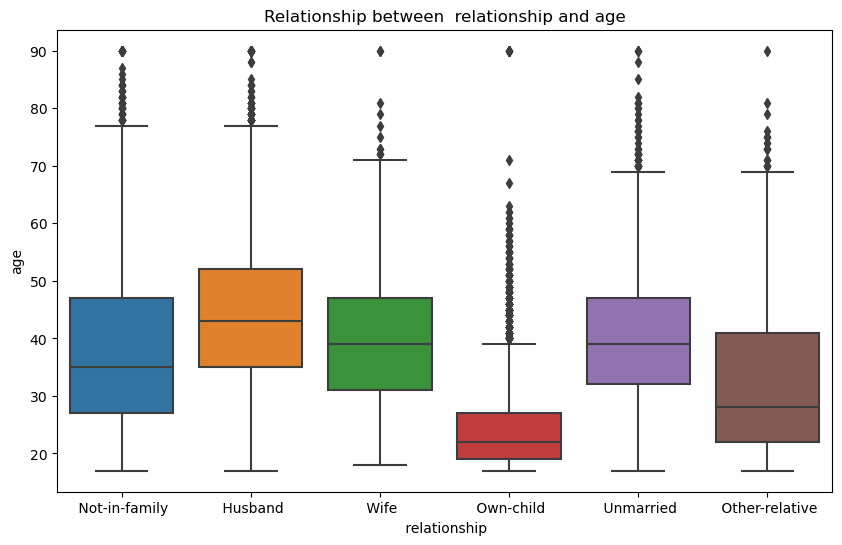

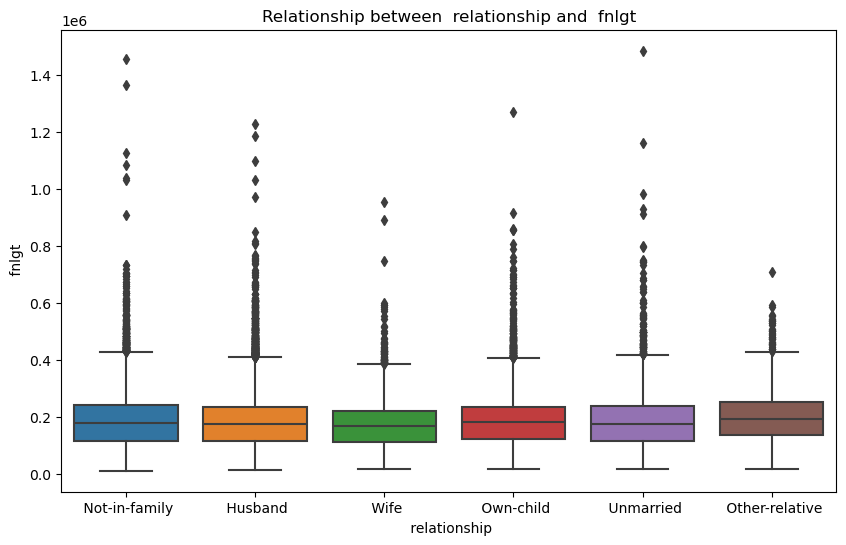

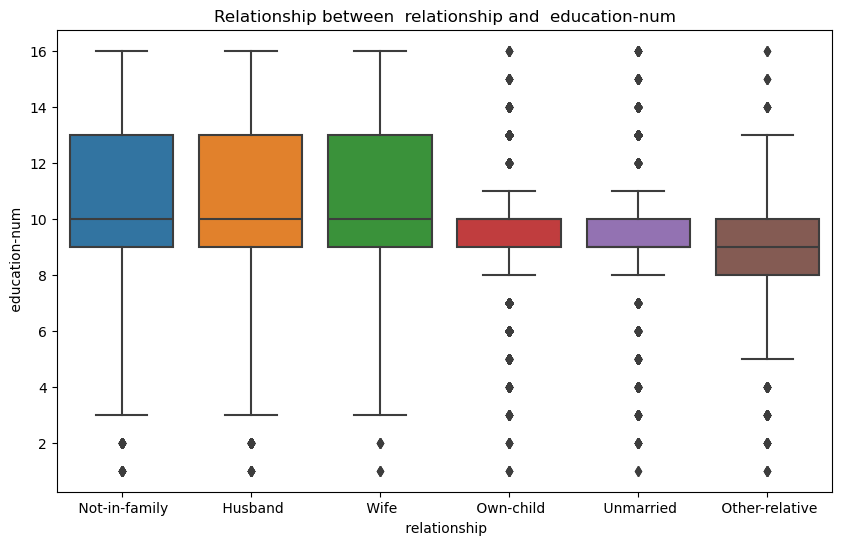

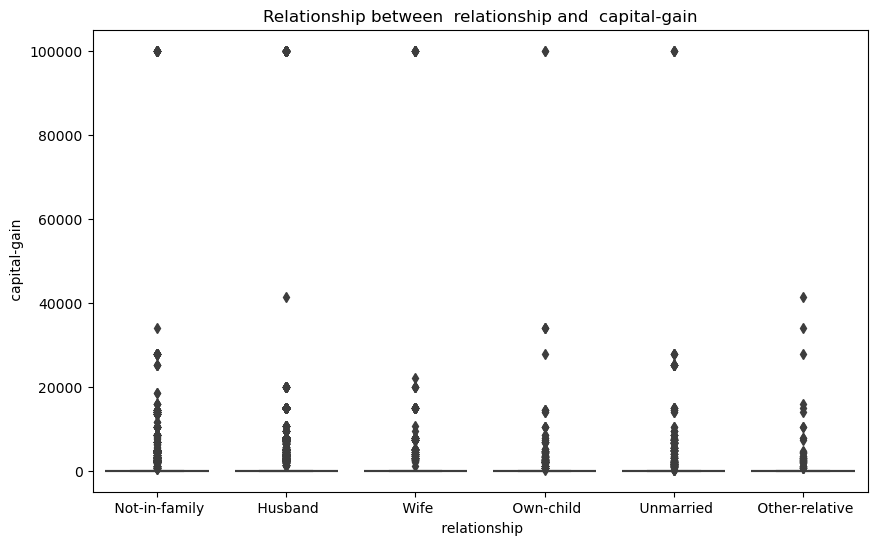

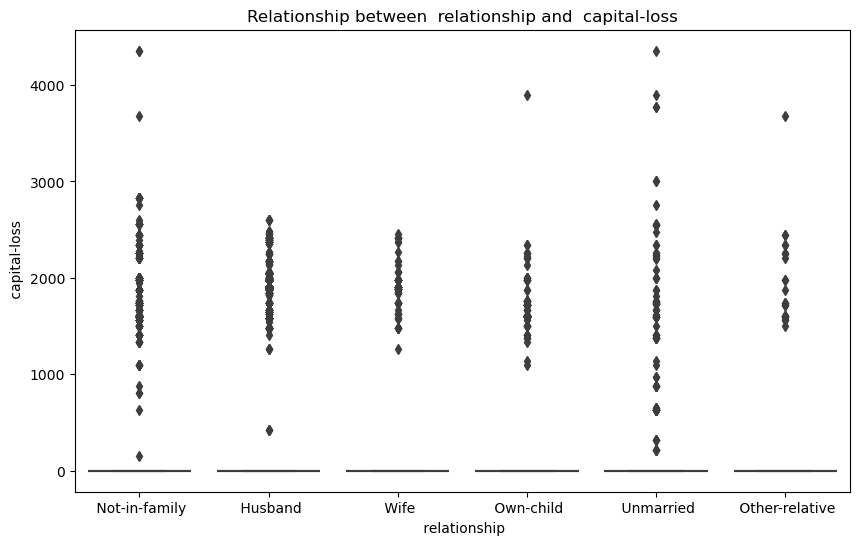

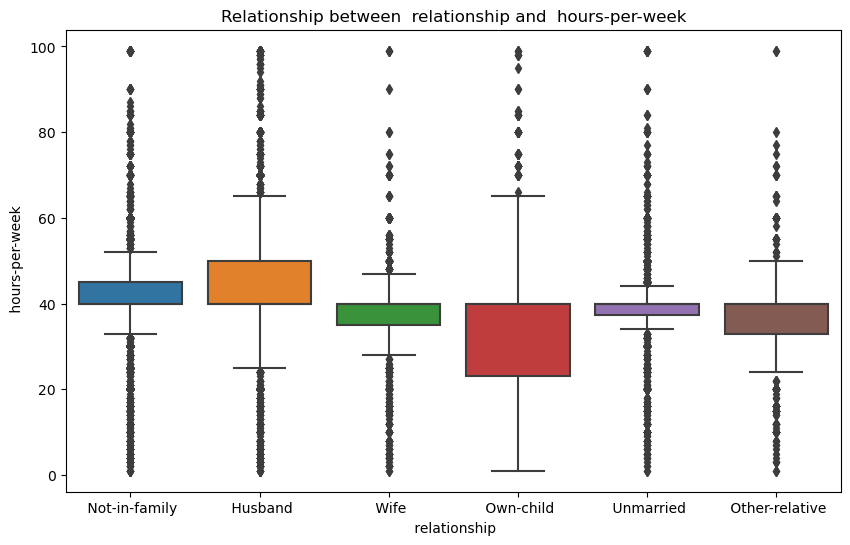

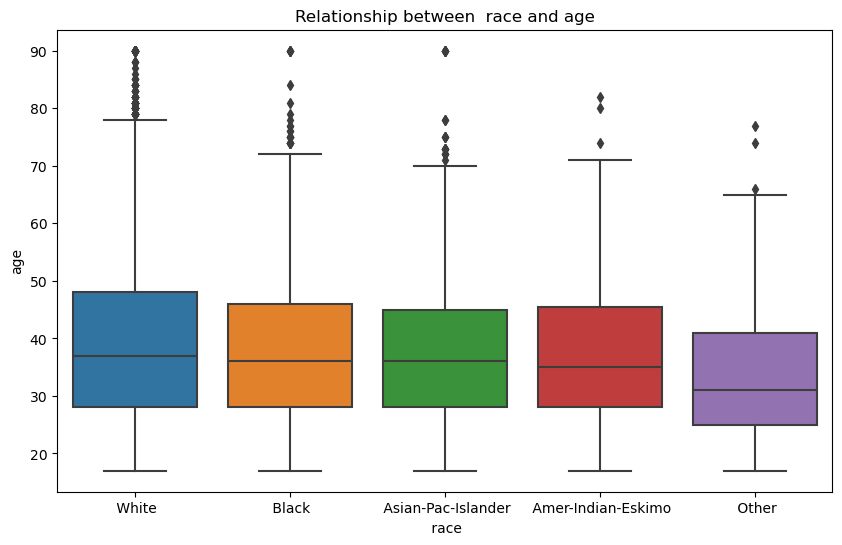

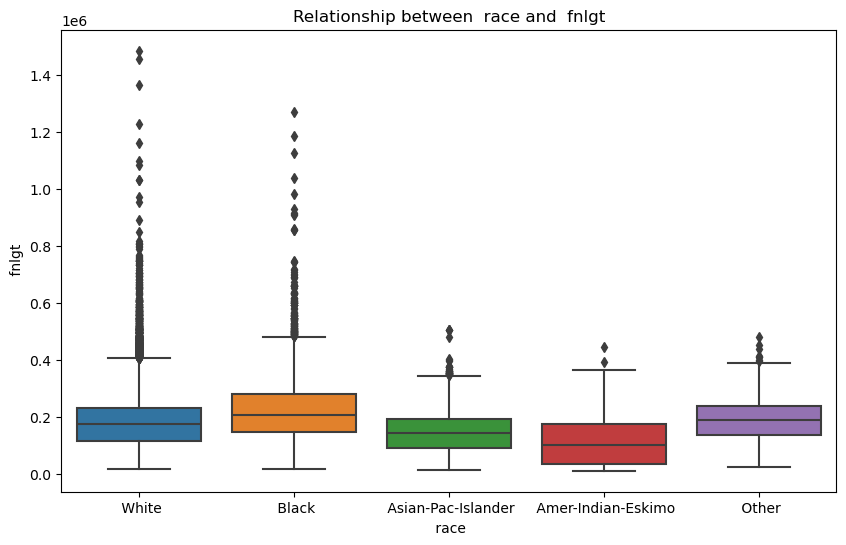

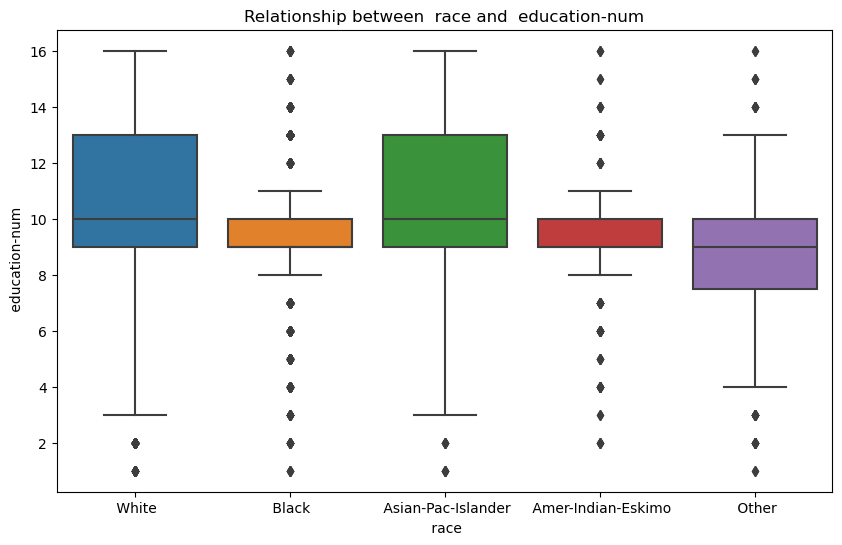

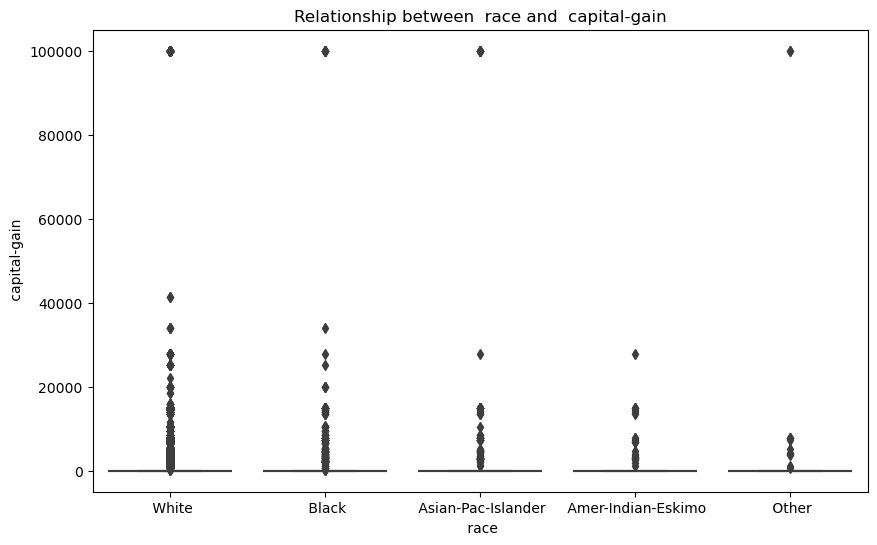

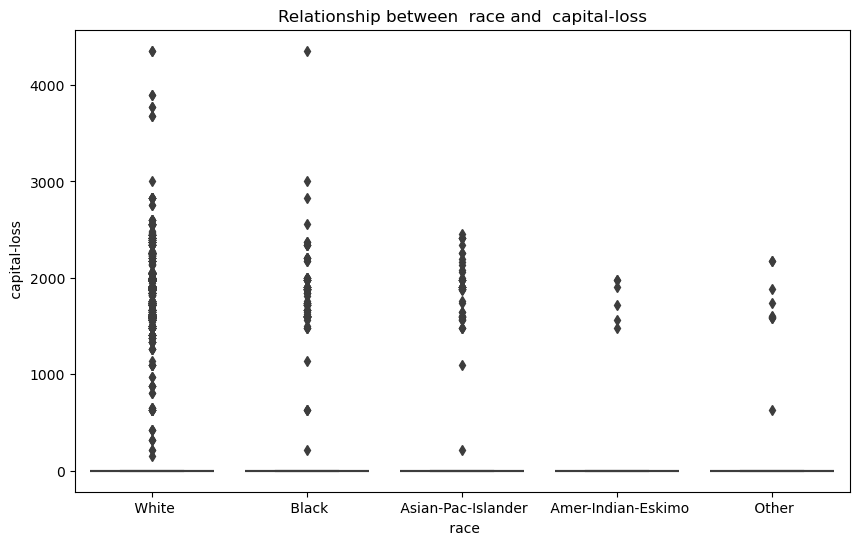

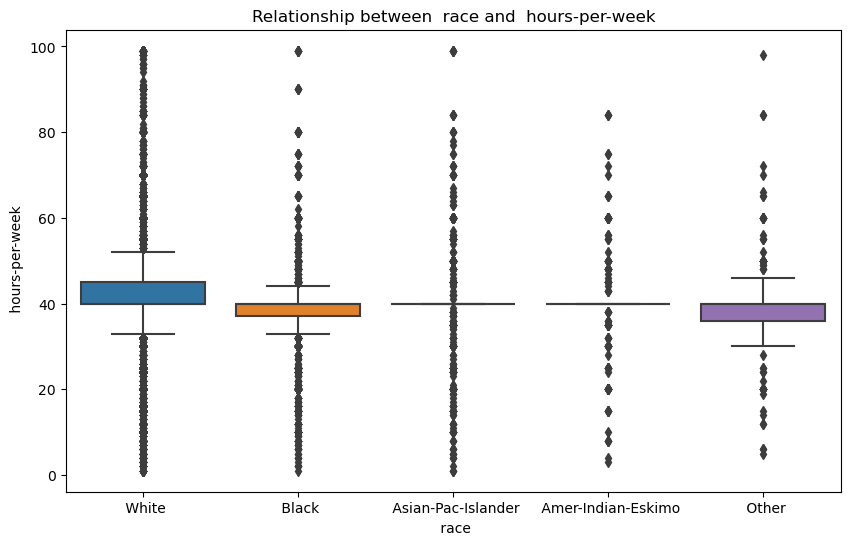

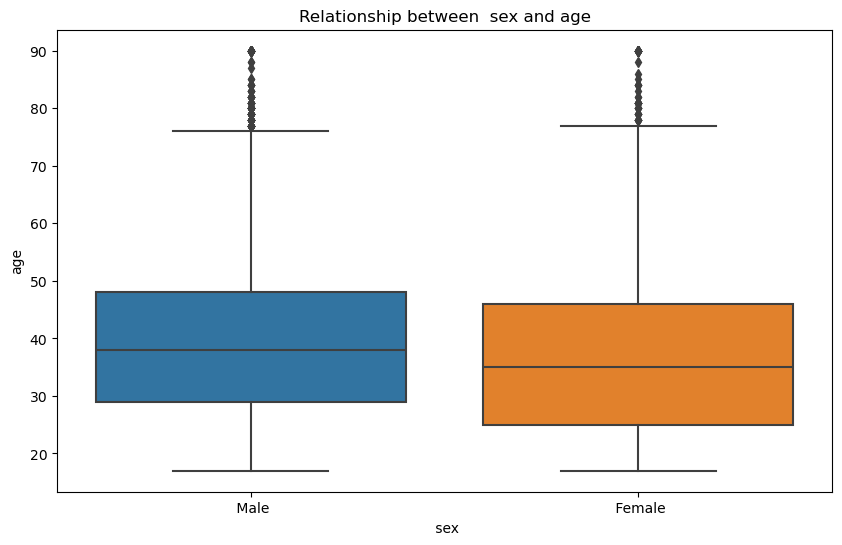

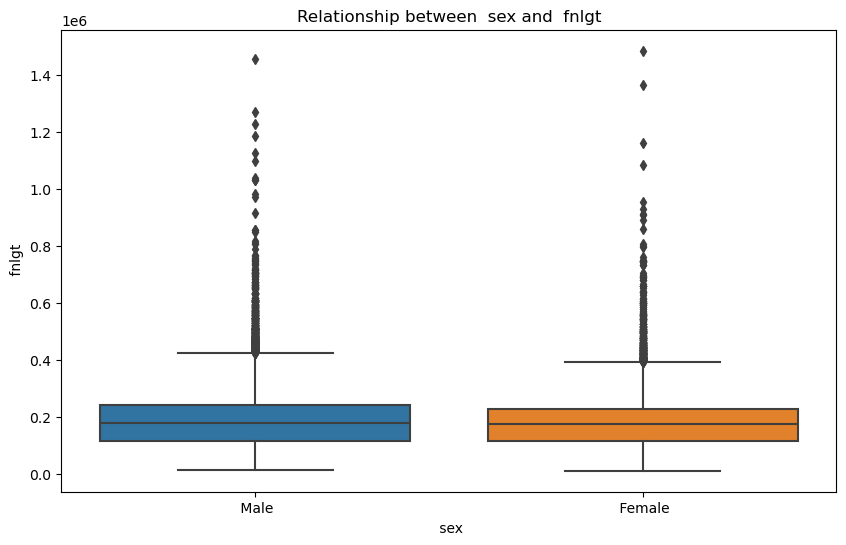

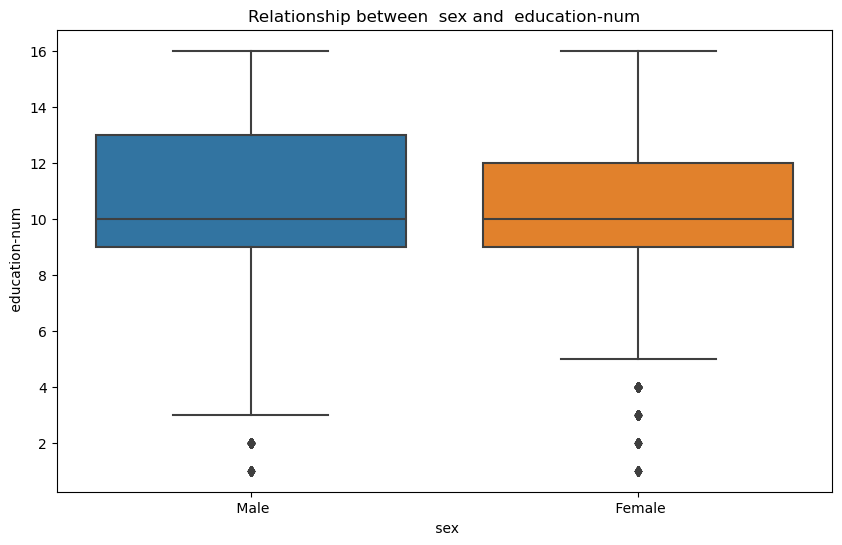

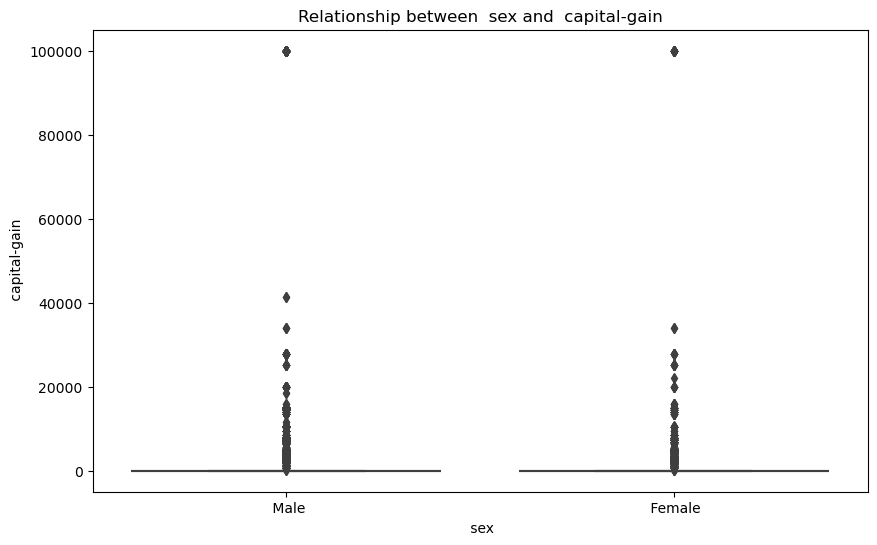

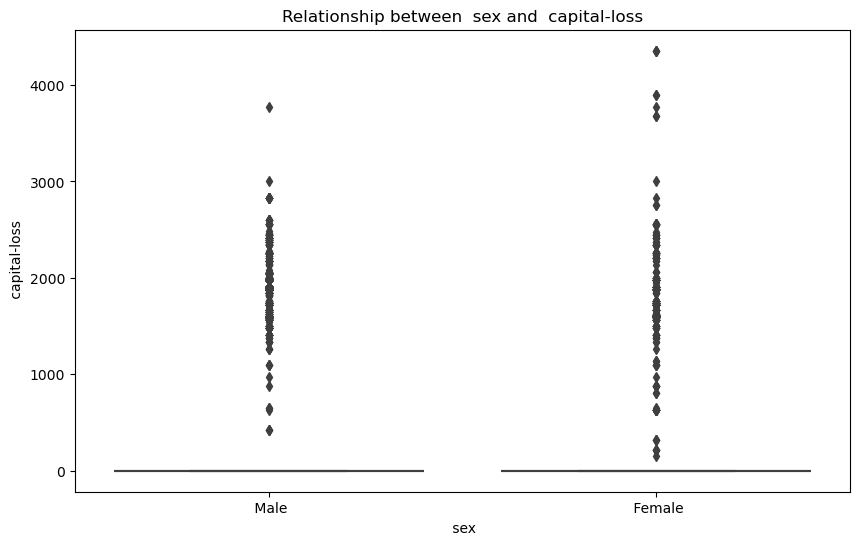

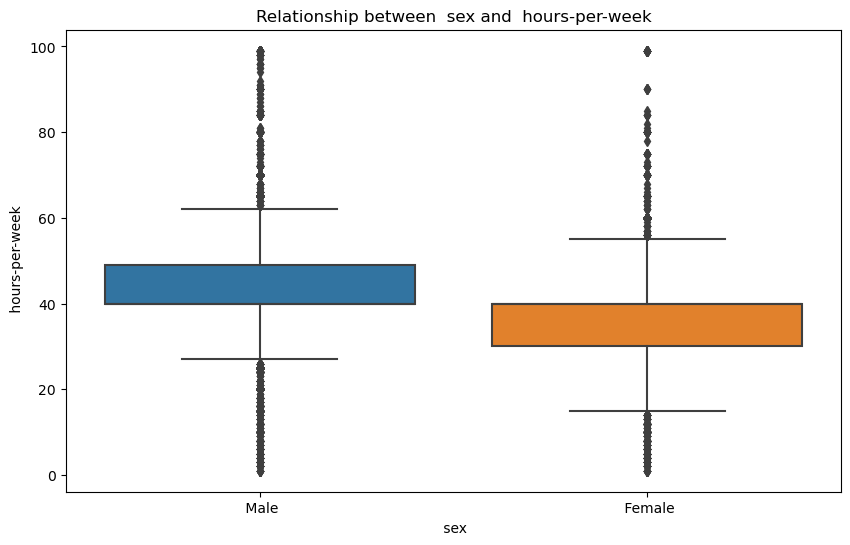

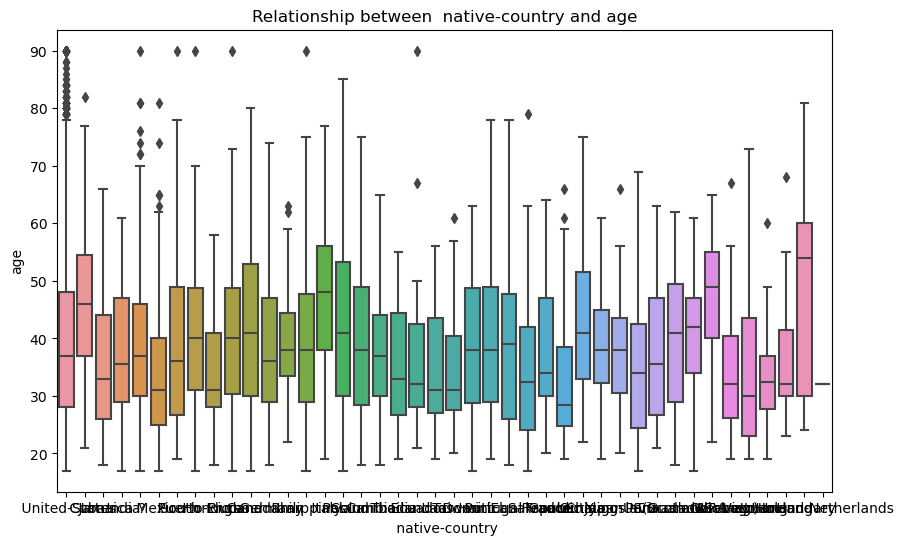

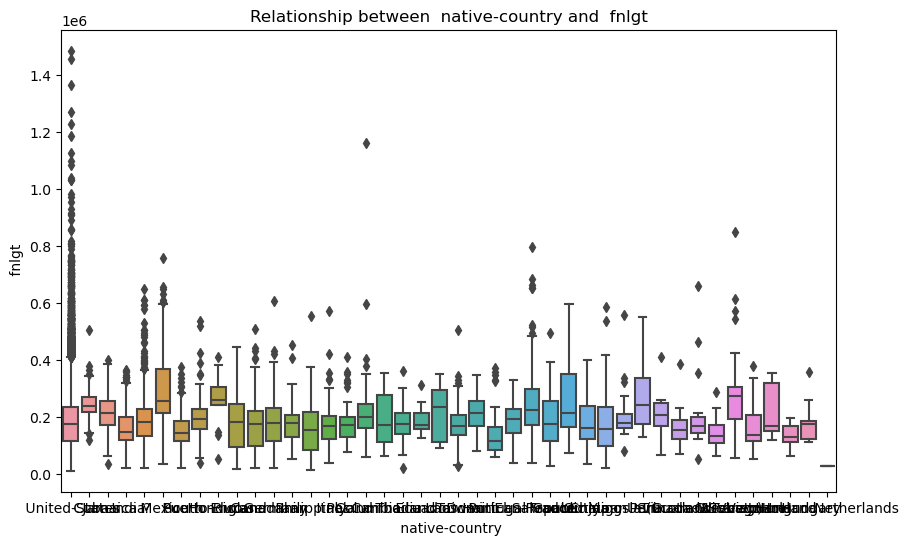

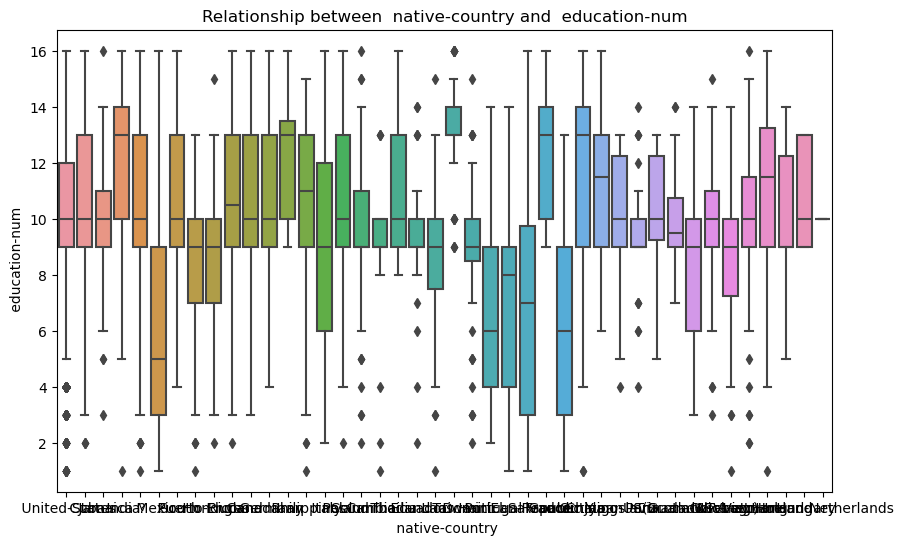

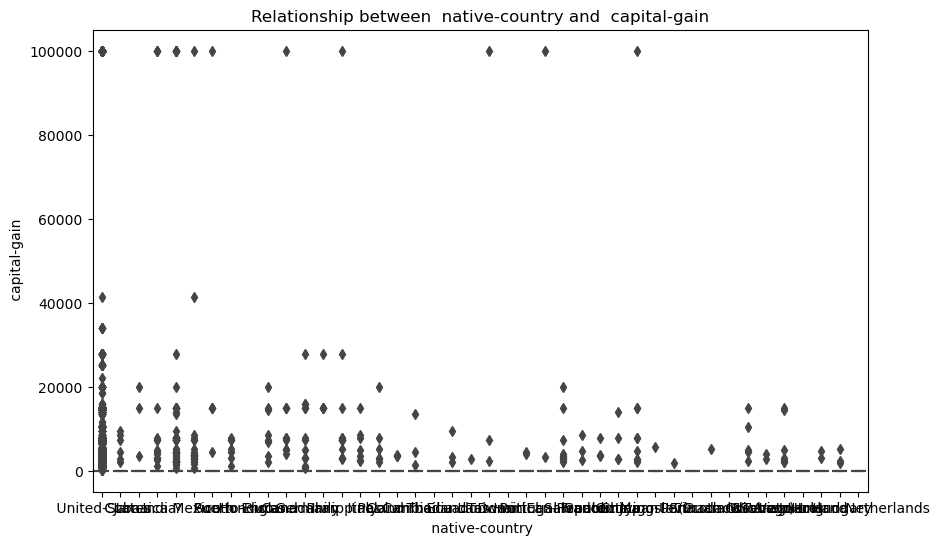

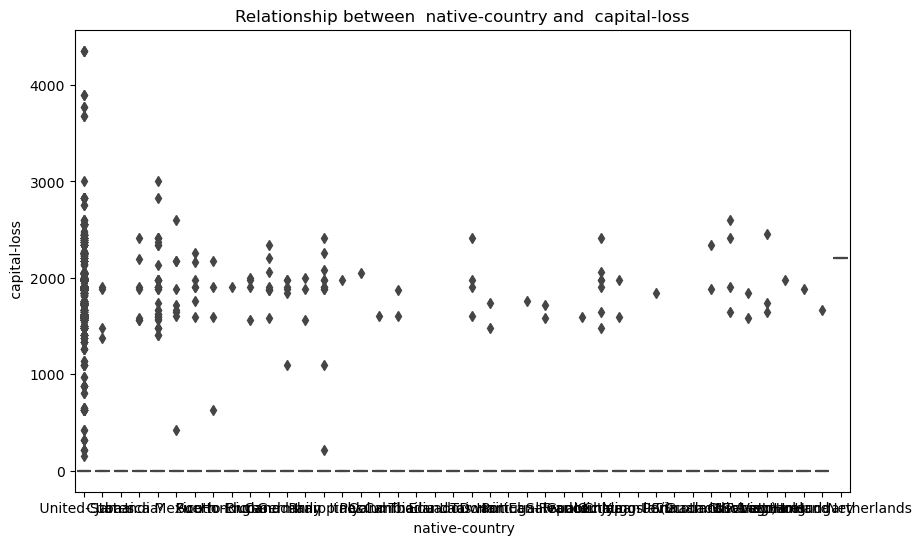

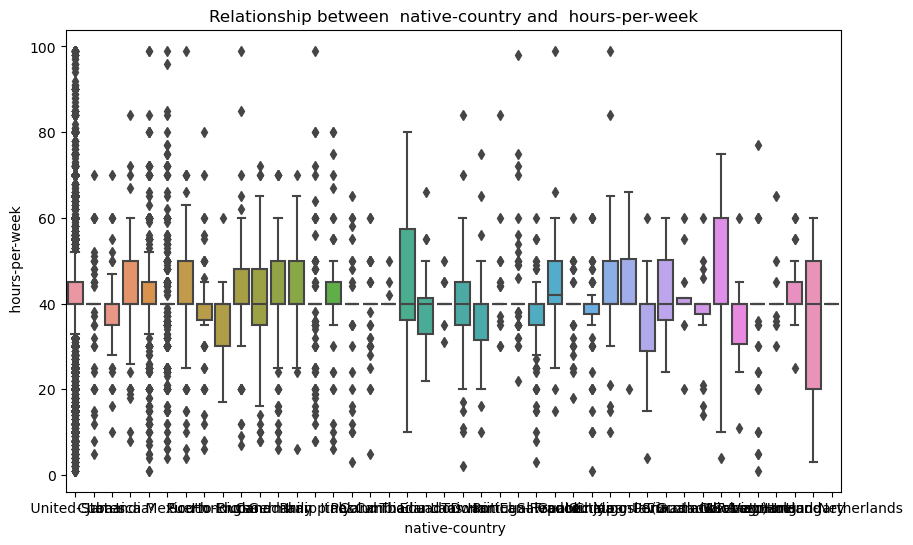

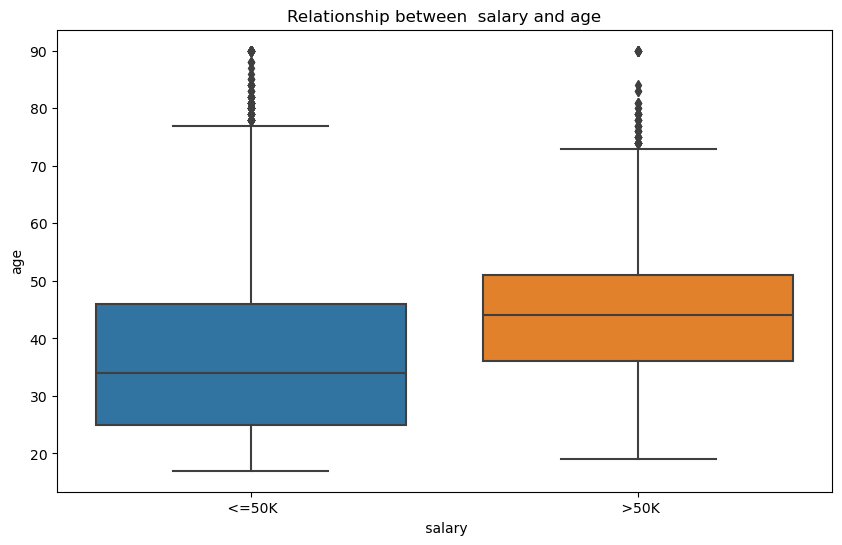

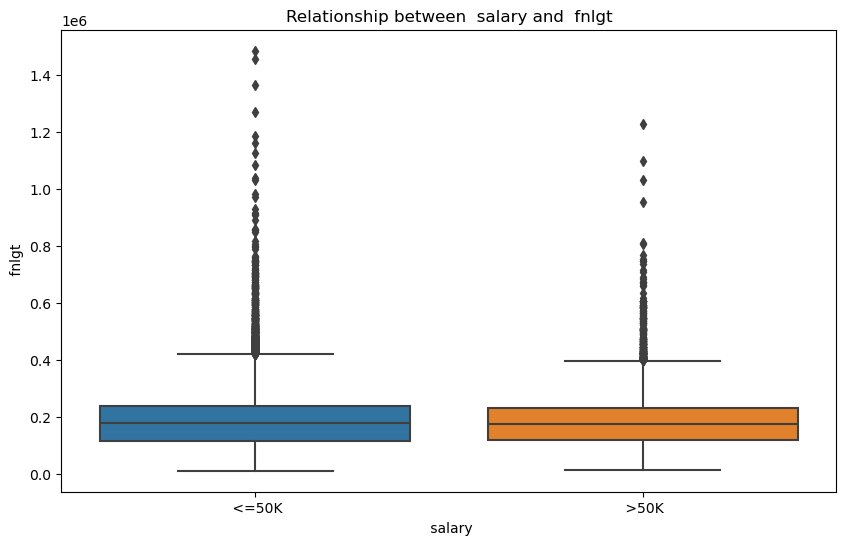

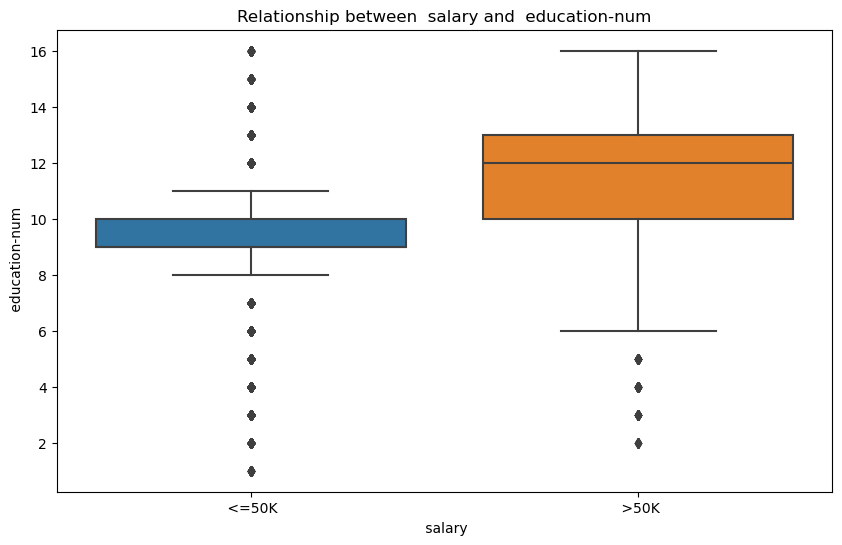

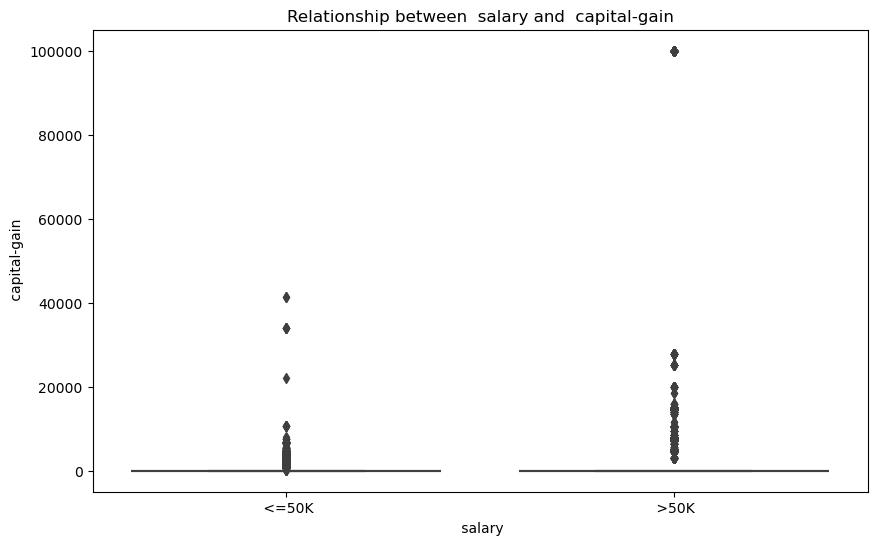

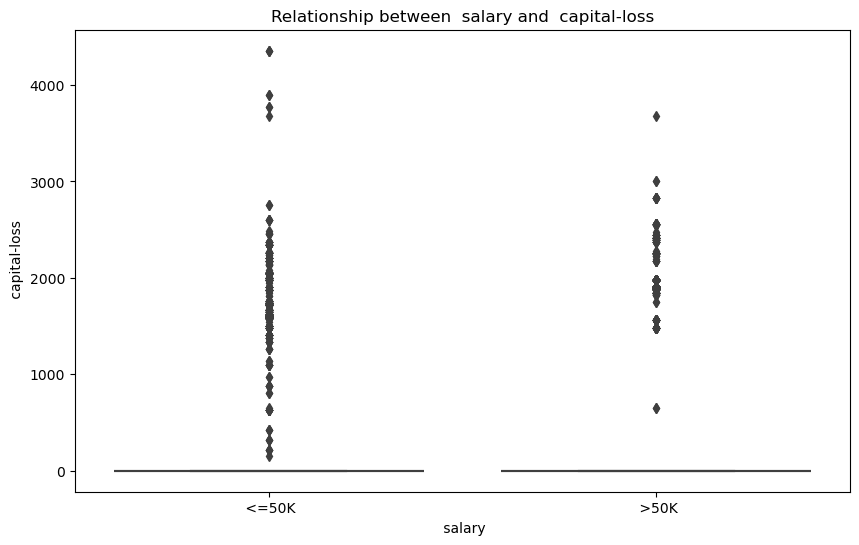

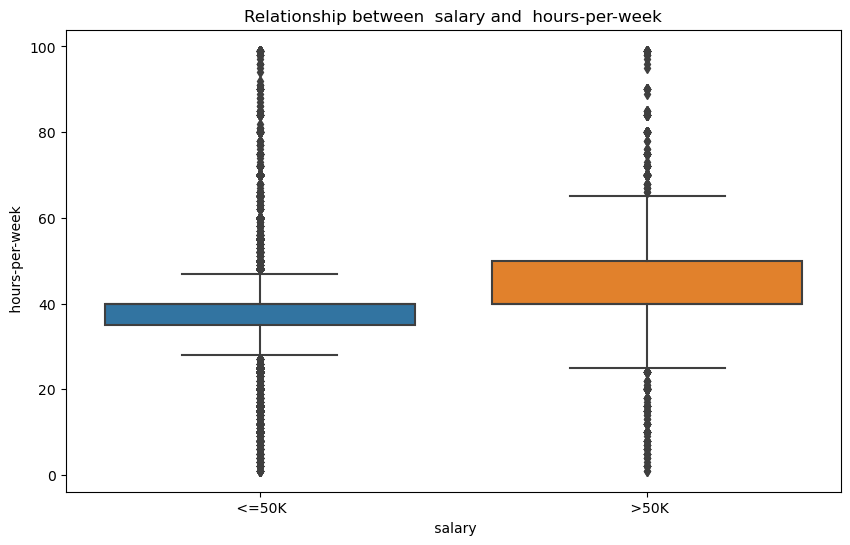

In [30]:
# Plotting relationships between numerical and categorical variables
for column in df.select_dtypes(include=['object']).columns:
    for num_column in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y=num_column, data=df)
        plt.title(f'Relationship between {column} and {num_column}')
        plt.show()